### 1. Project Information

**Project Title** : Application of Machine Learning for Imports-Exports Dataset Analysis

**Name and Roll Nos** : 055058, Vandana Jain


### 2. Description of Data

- **Data Source**: [Kaggle Imports-Exports Dataset](https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000)
- **Data Size**: ~2 MB
- **Data Type**: Cross-sectional
- **Data Dimension**: 16 Variables, 15,000 Observations
- **Data Variable Type**:
  - **Numeric**: Integer, Decimal
  - **Non-Numeric**: Categorical
- **Data Variable Category-I**:
  - **Index**: Transaction_ID
  - **Categorical (Nominal)**: Country, Product, Import_Export, Shipping_Method
  - **Categorical (Ordinal)**: Payment_Terms
  - **Non-Categorical**: Quantity, Value, Weight
- **Data Variable Category-II**:
  - **Input Variables or Features**: All variables except Import_Export
  - **Outcome Variable(s) or Feature(s)**: Import_Export
- **About Dataset**: The dataset contains transactional records of imports and exports across various countries, products, and ports. It includes details about shipment weight, value, and shipping methods, providing ample scope for clustering and classification tasks.


In [4]:
# project obsctives and problem statement

#Project Objectives | Problem Statements

###Objectives:
Prepare the dataset for machine learning algorithms.
Handle missing data effectively.
Transform categorical variables into a format usable by machine learning models.
Scale numerical data appropriately.
Ensure data quality and integrity before further analysis.

###Problem Statements:
The dataset contains both categorical and numerical data, requiring different preprocessing strategies.
Missing data needs to be handled to avoid biasing the models.
Categorical variables need to be transformed into a numerical format.
Numerical variables have different scales and distributions and need to be standardized or normalized.

In [5]:
#Import relevant libraries
import pandas as pd
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import statsmodels.api as sm
import io
import requests
from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau
from scipy.stats import skew, kurtosis, pearsonr, norm
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_text

In [6]:
#Load the dataset
vj58_file_id = '1PI0lJF4TrHIrPoFyyELVy1SP_ca5goRg'
vj58_url = f'https://drive.google.com/uc?id={vj58_file_id}'

# Fetch the data using requests
vj58_response = requests.get(vj58_url)
vj58_response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using io
vj58_imports_exports = pd.read_csv(io.StringIO(vj58_response.text))

# Display the first few rows of the DataFrame
vj58_imports_exports.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery


In [7]:
vj58_imports_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [8]:
vj58_imports_exports.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')

In [9]:
vj58_ds = vj58_imports_exports.sample(n = 5001, random_state=55058 )
vj58_ds.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
8519,51174082-1a5b-48a3-8631-e2ca4ac5fe85,Zambia,finish,Export,3917,3563.40,11-02-2020,Machinery,Kennethview,250552,4862.69,Air,"Hughes, Ruiz and Cox",Amanda Morris,93092428,Cash on Delivery
10329,5022d1d2-0776-4d31-a4d7-c5eb9fa354e5,Kuwait,participant,Import,7616,1499.50,08-05-2020,Furniture,Malonemouth,144189,1974.23,Land,"Arnold, Rodriguez and Lawrence",Cole Flowers,99695895,Net 30
14565,4aa76b23-c65e-445b-af60-5ee3409f5748,Saint Martin,debate,Export,7827,6592.99,23-07-2023,Furniture,East Richardchester,669111,950.98,Air,"Banks, White and Brown",Elizabeth Patterson,70821005,Net 30
525,3df8eeef-e44a-41f6-9251-ad083fcb34fa,Svalbard & Jan Mayen Islands,occur,Import,4402,7136.91,22-02-2021,Electronics,Robertshaven,946910,1702.59,Land,Mendez and Sons,Shannon White,67931413,Net 30
5075,b4c85b46-cc6c-4c66-b138-9d17cd941163,Trinidad and Tobago,southern,Import,8308,9378.19,18-10-2019,Furniture,Donnashire,349924,1128.05,Land,Carroll Group,Lisa Stone,85223145,Cash on Delivery


In [10]:
vj58_ds.describe()

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,4980.522296,5015.057864,551734.981604,2497.214903,5.018383e+07
std,2845.803313,2822.303800,260733.615373,1441.273170,2.892772e+07
min,1.000000,117.890000,100287.000000,0.570000,4.202600e+04
25%,2547.000000,2578.710000,324864.000000,1260.130000,2.481225e+07
50%,4993.000000,5017.160000,548492.000000,2469.490000,5.045035e+07
75%,7419.000000,7380.190000,778021.000000,3726.850000,7.495402e+07
max,9994.000000,9996.810000,999953.000000,4999.930000,9.999782e+07


          Quantity        Value   Customs_Code       Weight  Invoice_Number
count  5001.000000  5001.000000    5001.000000  5001.000000    5.001000e+03
mean   4980.522296  5015.057864  551734.981604  2497.214903    5.018383e+07
std    2845.803313  2822.303800  260733.615373  1441.273170    2.892772e+07
min       1.000000   117.890000  100287.000000     0.570000    4.202600e+04
25%    2547.000000  2578.710000  324864.000000  1260.130000    2.481225e+07
50%    4993.000000  5017.160000  548492.000000  2469.490000    5.045035e+07
75%    7419.000000  7380.190000  778021.000000  3726.850000    7.495402e+07
max    9994.000000  9996.810000  999953.000000  4999.930000    9.999782e+07


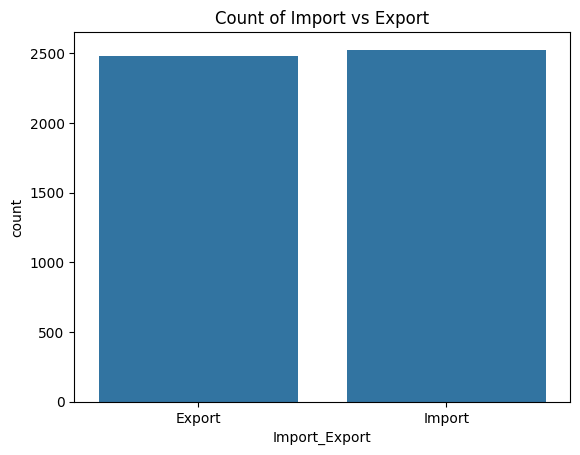

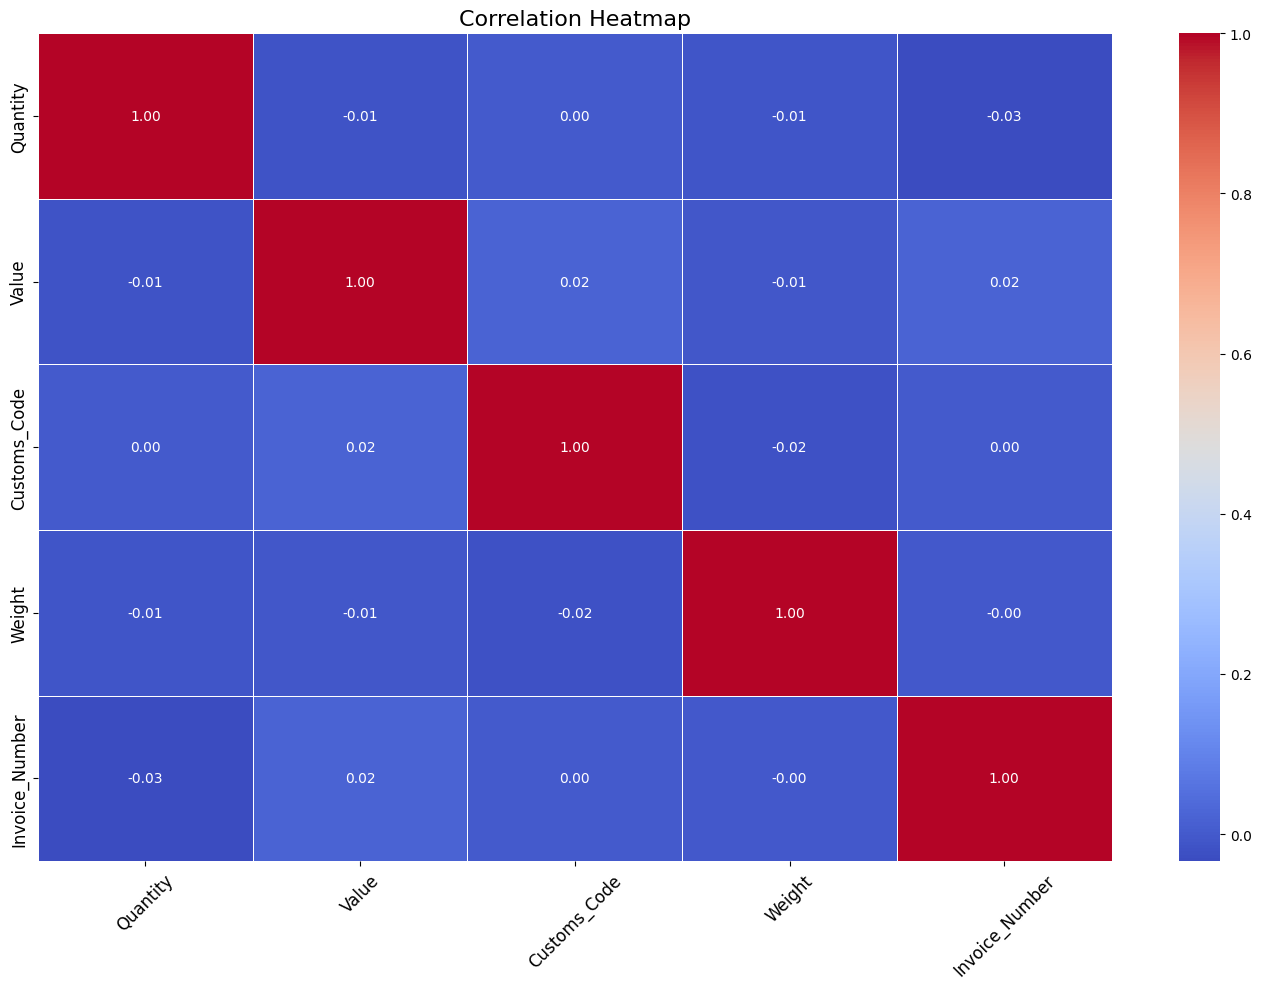

In [11]:
# Descriptive Statistics
print(vj58_ds.describe())

# Visualizations
# Bar Plot for a Categorical Column
sns.countplot(x='Import_Export', data=vj58_ds)
plt.title('Count of Import vs Export')
plt.show()

# Heatmap for Correlation (excluding non-numeric columns)
plt.figure(figsize=(14, 10))  # Increased figure size
numeric_df = vj58_ds.select_dtypes(include=['number'])  # Select only numeric columns for correlation
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar=True
)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


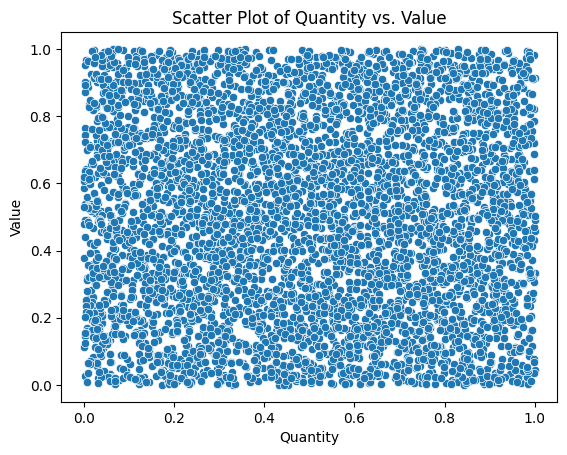

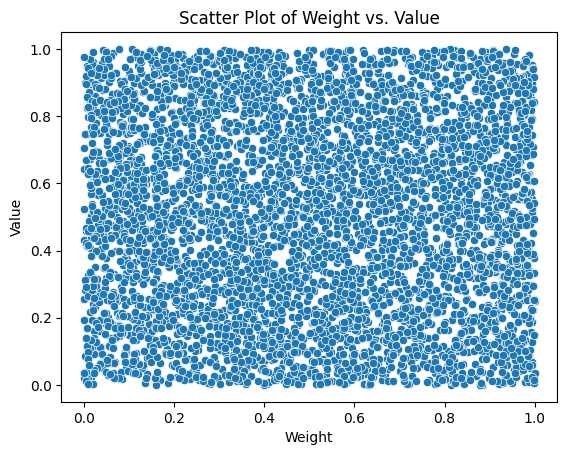

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=vj58_ds_preprocessed, x='Quantity', y='Value')
plt.title('Scatter Plot of Quantity vs. Value')
plt.show()

sns.scatterplot(data=vj58_ds_preprocessed, x='Weight', y='Value')
plt.title('Scatter Plot of Weight vs. Value')
plt.show()

In [12]:
# Subset of categorical variables
vj58_ds_cat = vj58_ds[['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']]
vj58_ds_cat.head()

,Import_Export,Category,Shipping_Method,Payment_Terms
8519,Export,Machinery,Air,Cash on Delivery
10329,Import,Furniture,Land,Net 30
14565,Export,Furniture,Air,Net 30
525,Import,Electronics,Land,Net 30
5075,Import,Furniture,Land,Cash on Delivery


In [13]:
# noncat subset and description
vj58_ds_noncat = vj58_ds[['Quantity','Value','Weight']]
vj58_ds_noncat.head()

,Quantity,Value,Weight
8519,3917,3563.40,4862.69
10329,7616,1499.50,1974.23
14565,7827,6592.99,950.98
525,4402,7136.91,1702.59
5075,8308,9378.19,1128.05


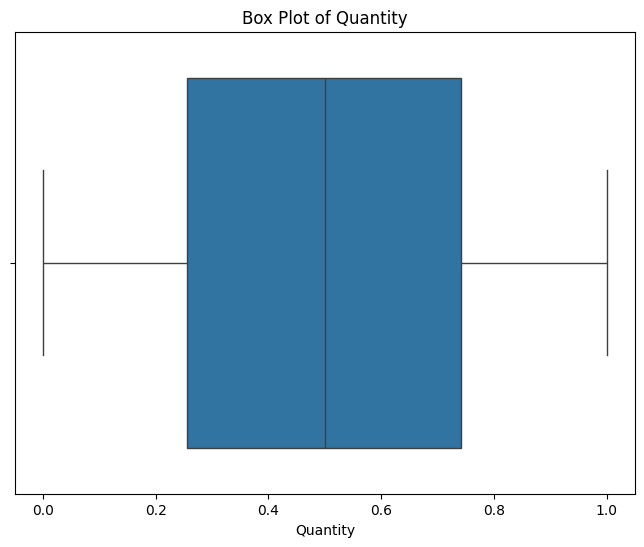

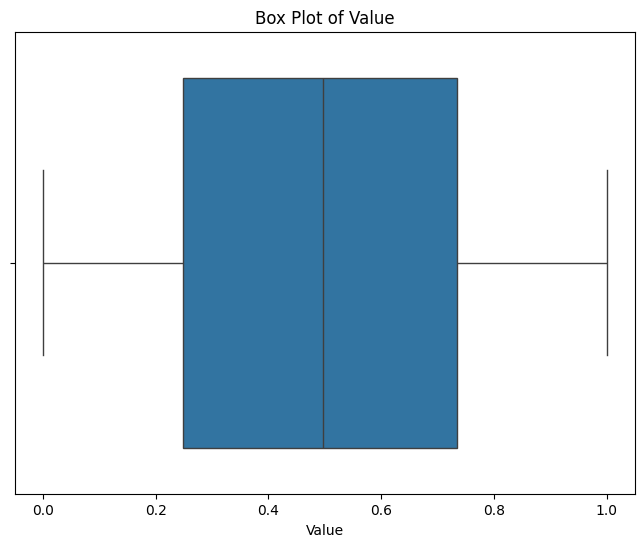

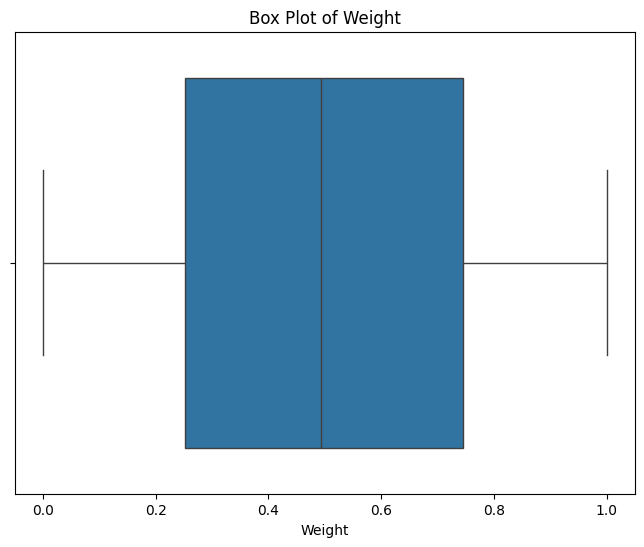

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Quantity', 'Value', 'Weight']
for col in numerical_cols:
 plt.figure(figsize=(8, 6))
 sns.boxplot(x=vj58_ds_preprocessed[col])
 plt.title(f'Box Plot of {col}')
 plt.show()

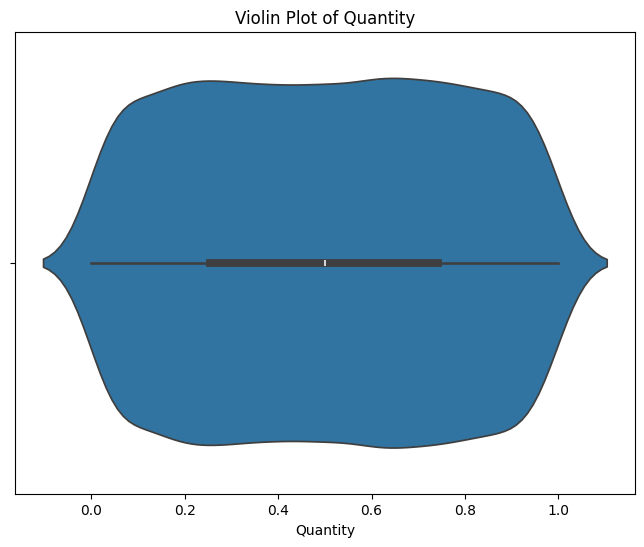

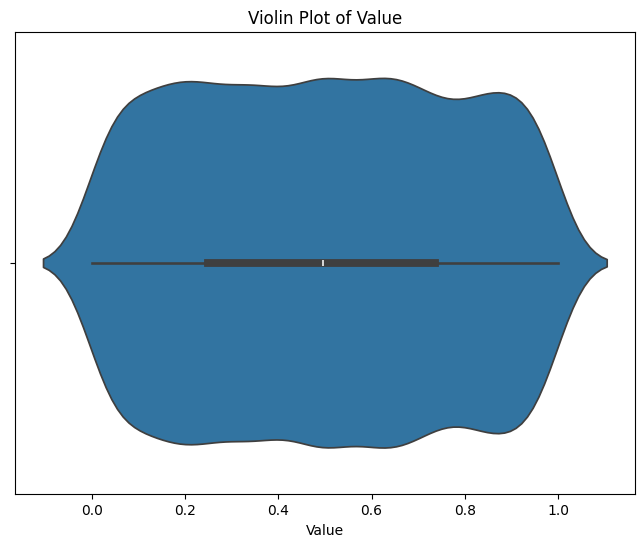

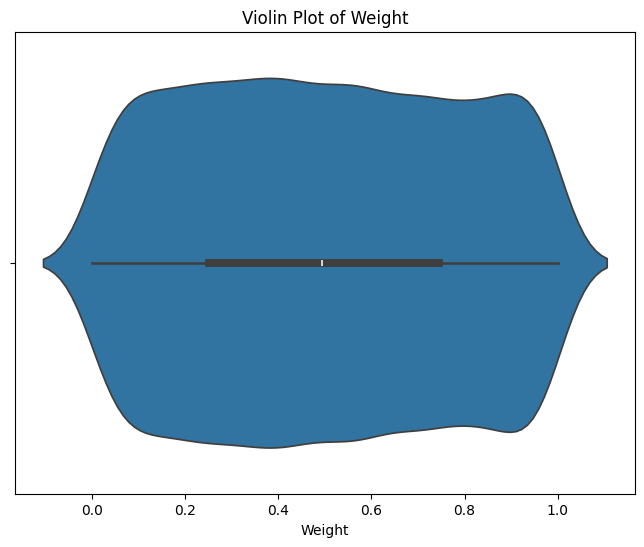

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=vj58_ds_preprocessed[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()

In [14]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming your non-categorical data is in a DataFrame called 'vj58_ds'

def descriptive_stats(df):
    """
    Calculates descriptive statistics for non-categorical variables.

    Args:
        df: DataFrame containing non-categorical data.

    Returns:
        DataFrame with descriptive statistics.
    """

    stats_list = []  # Initialize as a list to store rows as dictionaries
    for col in df.columns:
        # Central Tendency
        minimum = df[col].min()
        maximum = df[col].max()
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()[0]  # Taking the first mode if multiple exist
        percentiles = np.percentile(df[col], [25, 50, 75])

        # Dispersion
        range_val = maximum - minimum
        std_dev = df[col].std()
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()

        # Correlations (assuming another column 'other_col' for correlation)
        # Replace 'other_col' with the actual column name if needed
        if len(df.columns) > 1:
            other_col = df.columns[df.columns != col][0]  #selecting another column
            pearson_corr = df[col].corr(df[other_col], method='pearson')
            spearman_corr = df[col].corr(df[other_col], method='spearman')
        else:
            pearson_corr = np.nan  # Or any appropriate value
            spearman_corr = np.nan  # Or any appropriate value

        # Composite Measures
        coeff_var = std_dev / mean if mean != 0 else np.nan  # Avoid division by zero
        conf_interval = stats.t.interval(0.95, len(df[col]) - 1, loc=mean, scale=stats.sem(df[col]))

        # Append a dictionary for each row to the list
        stats_list.append({
            'Variable': col,
            'Min': minimum,
            'Max': maximum,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            '25th Percentile': percentiles[0],
            '50th Percentile': percentiles[1],
            '75th Percentile': percentiles[2],
            'Range': range_val,
            'Standard Deviation': std_dev,
            'Skewness': skewness,
            'Kurtosis': kurtosis,
            'Pearson Correlation': pearson_corr,
            'Spearman Correlation': spearman_corr,
            'Coefficient of Variation': coeff_var,
            'Confidence Interval (95%)': conf_interval
        })

    # Create the DataFrame from the list of dictionaries
    stats_df = pd.DataFrame(stats_list)

    return stats_df

# Example usage with your non-categorical DataFrame:
vj58_ds_noncat = vj58_ds[['Quantity', 'Value', 'Weight']]
descriptive_stats_df = descriptive_stats(vj58_ds_noncat)
print(descriptive_stats_df)

   Variable     Min      Max         Mean   Median     Mode  25th Percentile  \
0  Quantity    1.00  9994.00  4980.522296  4993.00  5768.00          2547.00   
1     Value  117.89  9996.81  5015.057864  5017.16   983.96          2578.71   
2    Weight    0.57  4999.93  2497.214903  2469.49   405.56          1260.13   

   50th Percentile  75th Percentile    Range  Standard Deviation  Skewness  \
0          4993.00          7419.00  9993.00         2845.803313 -0.003112   
1          5017.16          7380.19  9878.92         2822.303800  0.017167   
2          2469.49          3726.85  4999.36         1441.273170  0.036378   

   Kurtosis  Pearson Correlation  Spearman Correlation  \
0 -1.174461            -0.014820             -0.014994   
1 -1.169888            -0.014820             -0.014994   
2 -1.178044            -0.011129             -0.011235   

   Coefficient of Variation                 Confidence Interval (95%)  
0                  0.571387    (4901.630891088706, 5059.41369

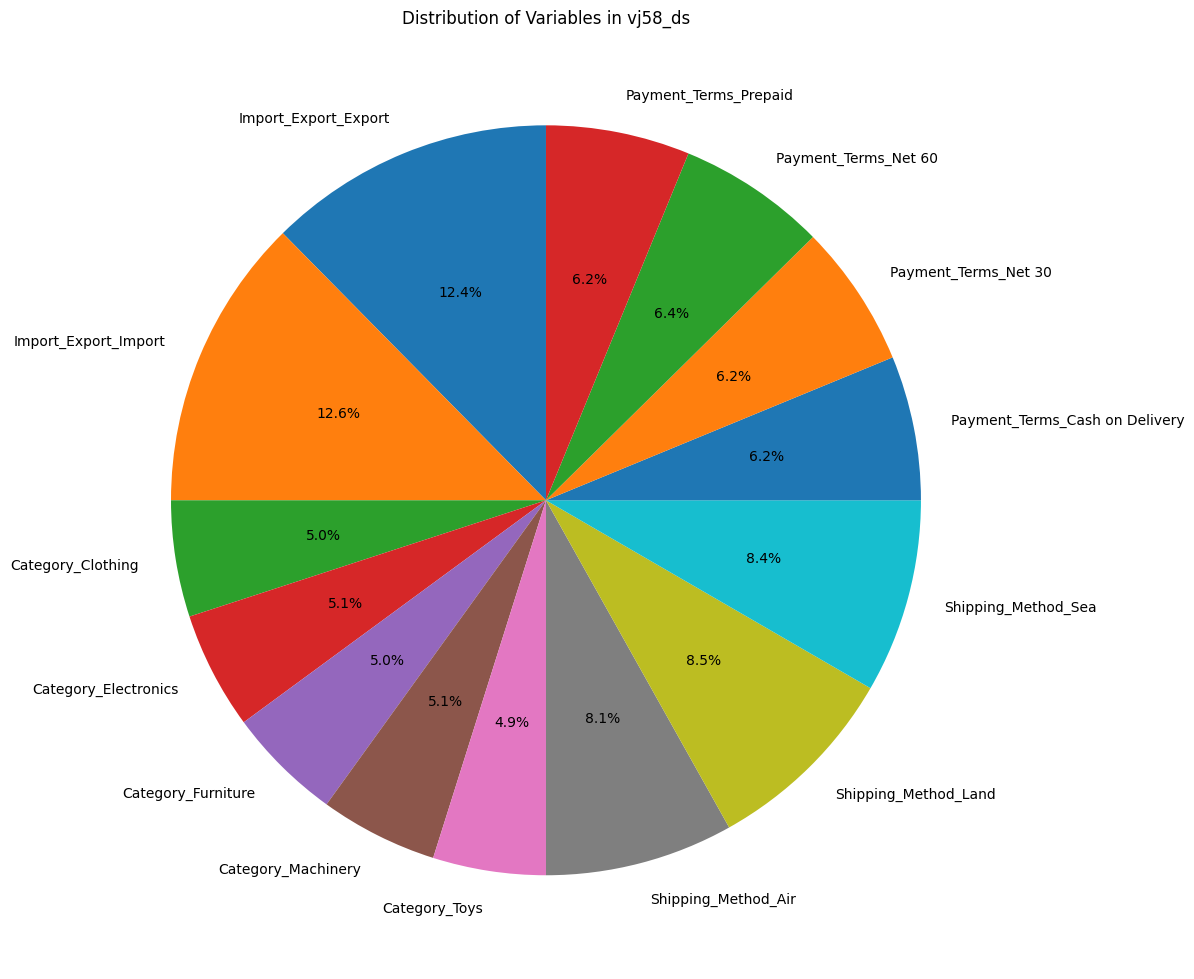

In [15]:
import matplotlib.pyplot as plt
import pandas as pd


# Select the columns you want in the pie chart
# Include both numerical and categorical columns
selected_columns = ['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']  # Only include available columns
pie_chart_data = vj58_ds[selected_columns]

# 2. Convert Categorical to Numerical (if needed)

# If you have unencoded categorical columns, use one-hot encoding:
pie_chart_data = pd.get_dummies(pie_chart_data,
                               columns=['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms'], # Replace with your actual categorical columns
                               prefix=['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms'],
                               prefix_sep='_')

# 3. Calculate Proportions or Counts for the Pie Chart


# For categorical variables (now one-hot encoded), use their counts:
categorical_cols = pie_chart_data.columns  # All columns are categorical after one-hot encoding
categorical_counts = pie_chart_data[categorical_cols].sum()


# 4. Create the Pie Chart

# Use categorical counts for the pie chart
pie_chart_values = categorical_counts
pie_chart_labels = pie_chart_values.index


plt.figure(figsize=(12, 12))  # Adjust figure size as needed
plt.pie(pie_chart_values, labels=pie_chart_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Variables in vj58_ds')
plt.tight_layout()  # To prevent labels from overlapping
plt.show()

In [16]:
#descriptive stats report

## Project Objectives and Problem Statements

### Objectives
1. Summarize and understand the dataset's basic characteristics.
2. Describe the central tendency and dispersion of numeric variables.
3. Examine the distribution and relationships between variables.
4. Identify potential outliers or anomalies in the data.
5. Understand the distribution of categorical variables.
6. Provide actionable insights into the dataset.

### Problem Statements
1. How are the numeric variables (`Quantity`, `Value`, `Weight`) distributed? What are their typical values and ranges?
2. What relationships exist between numeric variables?
3. How are the categorical variables (`Import_Export`, `Category`, `Shipping_Method`, `Payment_Terms`) distributed?
4. What are the possible outliers, and how should they be handled?

---

## Analysis of Data

### General Descriptive Statistics
1. Used `.describe()` method in pandas for numeric variables to compute:
   - Count, mean, standard deviation, min, 25th percentile, median, 75th percentile, and max.
2. Visualized `Import_Export` frequency using `sns.countplot`.
3. Displayed correlations between numeric variables using `sns.heatmap`.

### Detailed Descriptive Statistics for Numeric Variables
1. Created a custom function `descriptive_stats` to compute:
   - **Central Tendency Measures**: Minimum, maximum, mean, median, mode, 25th, 50th, and 75th percentiles.
   - **Dispersion Measures**: Range, standard deviation, skewness, kurtosis.
   - **Correlation Measures**: Pearson and Spearman correlations for numeric variable pairs.
   - **Composite Measures**: Coefficient of variation and 95% confidence intervals.

### Detailed Descriptive Statistics for Categorical Variables
1. Counted the number of occurrences for each category.
2. Visualized category proportions using pie charts.

---

## Observations and Findings

### General Observations
1. Dataset contains both numeric and categorical variables.
2. Initial exploration (`.head()`) and column listings clarified dataset structure.
3. Basic statistics showed a balanced count of imports and exports.
4. A heatmap revealed correlations between numeric variables.

### Numeric Variables (`Quantity`, `Value`, `Weight`)
1. **Central Tendency**:
   - Mean, median, and mode varied across variables.
   - Significant range between minimum and maximum values.
2. **Dispersion**:
   - Standard deviation quantified data spread.
   - Skewness and kurtosis provided insights into distribution shapes.
3. **Correlation**:
   - Pearson and Spearman correlations highlighted linear and monotonic relationships.
4. **Composite Measures**:
   - Coefficient of variation showed relative variability.
   - 95% confidence interval estimated mean reliability.

### Categorical Variables
1. Category proportions were calculated and visualized for strategic insights.

---

## Managerial Insights and Recommendations

### Data Understanding
1. Descriptive statistics provide a foundation for decision-making.
2. Clear understanding of `Quantity`, `Value`, and `Weight` supports goal-setting.

### Variable Relationships
1. Relationships between variables like `Weight` and `Value` suggest underlying business dynamics.
2. Further predictive modeling could explore these correlations in-depth.

### Data Quality
1. Identified ranges, skewness, and kurtosis indicate potential anomalies or data quality issues.

### Outlier Handling
1. Address outliers by either removal or imputation to maintain dataset reliability.

### Categorical Variables
1. Insights into category distributions help shape operational strategies.

### Further Analysis
1. Foundation set for advanced analyses like clustering or time-series modeling.
2. Descriptive statistics guide model selection for future data analysis.
3. Data can drive actionable insights for business decisions.



In [17]:
# Handling Missing Data
def missing_data_summary(df):
    """
    Creates a DataFrame summarizing missing data statistics.

    Args:
        df: The input DataFrame.

    Returns:
        A DataFrame with missing data count and percentage for each variable and row.
    """
    # Column-wise summary
    missing_count_col = df.isnull().sum()
    missing_percentage_col = (missing_count_col / len(df)) * 100
    missing_summary_col = pd.DataFrame({
        'Missing Count': missing_count_col,
        'Missing Percentage': missing_percentage_col
    })
    # Row-wise summary
    missing_count_row = df.isnull().sum(axis=1)
    missing_percentage_row = (missing_count_row / len(df.columns)) * 100
    missing_summary_row = pd.DataFrame({
        'Missing Count': missing_count_row,
        'Missing Percentage': missing_percentage_row
    }, index=df.index)  # Use original DataFrame index

    return missing_summary_col, missing_summary_row

# Calculate missing data summary for categorical subset
vj58_missing_summary_cat_col, vj58_missing_summary_cat_row = missing_data_summary(vj58_ds_cat)

# Calculate missing data summary for non-categorical subset
vj58_missing_summary_noncat_col, vj58_missing_summary_noncat_row = missing_data_summary(vj58_ds_noncat)

# Drop columns and rows with more than 50% missing data for categorical subset
vj58_ds_cat_treated = vj58_ds_cat.dropna(thresh=len(vj58_ds_cat) * 0.5, axis=1)
vj58_ds_cat_treated = vj58_ds_cat_treated.dropna(thresh=len(vj58_ds_cat_treated.columns) * 0.5, axis=0)

# Drop columns and rows with more than 50% missing data for non-categorical subset
vj58_ds_noncat_treated = vj58_ds_noncat.dropna(thresh=len(vj58_ds_noncat) * 0.5, axis=1)
vj58_ds_noncat_treated = vj58_ds_noncat_treated.dropna(thresh=len(vj58_ds_noncat_treated.columns) * 0.5, axis=0)

# Calculate total variables and rows dropped
vj58_dropped_variables_cat = len(vj58_ds_cat.columns) - len(vj58_ds_cat_treated.columns)
vj58_dropped_rows_cat = len(vj58_ds_cat) - len(vj58_ds_cat_treated)
vj58_dropped_variables_noncat = len(vj58_ds_noncat.columns) - len(vj58_ds_noncat_treated.columns)
vj58_dropped_rows_noncat = len(vj58_ds_noncat) - len(vj58_ds_noncat_treated)

vj58_total_dropped_variables = vj58_dropped_variables_cat + vj58_dropped_variables_noncat
vj58_total_dropped_rows = vj58_dropped_rows_cat + vj58_dropped_rows_noncat

# Print missing data summaries
print("Categorical Missing Data Summary (Columns):")
print(vj58_missing_summary_cat_col)
print("\nCategorical Missing Data Summary (Rows):")
print(vj58_missing_summary_cat_row)
print("\nNon-Categorical Missing Data Summary (Columns):")
print(vj58_missing_summary_noncat_col)
print("\nNon-Categorical Missing Data Summary (Rows):")
print(vj58_missing_summary_noncat_row)

# Print total dropped variables and rows
print(f"\nTotal variables dropped: {vj58_total_dropped_variables}")
print(f"Total rows dropped: {vj58_total_dropped_rows}")



Categorical Missing Data Summary (Columns):
                 Missing Count  Missing Percentage
Import_Export                0                 0.0
Category                     0                 0.0
Shipping_Method              0                 0.0
Payment_Terms                0                 0.0

Categorical Missing Data Summary (Rows):
       Missing Count  Missing Percentage
8519               0                 0.0
10329              0                 0.0
14565              0                 0.0
525                0                 0.0
5075               0                 0.0
...              ...                 ...
1138               0                 0.0
10256              0                 0.0
6239               0                 0.0
9990               0                 0.0
7564               0                 0.0

[5001 rows x 2 columns]

Non-Categorical Missing Data Summary (Columns):
          Missing Count  Missing Percentage
Quantity              0                 0.0
Value

In [18]:
# Create imputers for categorical and non-categorical data
vj58_imputer_cat = SimpleImputer(strategy='most_frequent')  # Mode for categorical
vj58_imputer_noncat = SimpleImputer(strategy='mean')  # Mean for non-categorical

# Fit and transform imputers on the treated datasets
vj58_ds_cat_imputed = pd.DataFrame(vj58_imputer_cat.fit_transform(vj58_ds_cat_treated),
                                  columns=vj58_ds_cat_treated.columns,
                                  index=vj58_ds_cat_treated.index)
vj58_ds_noncat_imputed = pd.DataFrame(vj58_imputer_noncat.fit_transform(vj58_ds_noncat_treated),
                                    columns=vj58_ds_noncat_treated.columns,
                                    index=vj58_ds_noncat_treated.index)

# Count imputed values
vj58_imputed_count_cat = vj58_ds_cat_imputed.isnull().sum().sum() - vj58_ds_cat_treated.isnull().sum().sum()
vj58_imputed_count_noncat = vj58_ds_noncat_imputed.isnull().sum().sum() - vj58_ds_noncat_treated.isnull().sum().sum()

# Print head of imputed datasets
print("Imputed Categorical Dataset:")
print(vj58_ds_cat_imputed.head())

print("\nHead of Imputed Non-Categorical Dataset:")
print(vj58_ds_noncat_imputed.head())

# Print count of imputed values
print(f"\nNumber of imputed values in categorical dataset: {vj58_imputed_count_cat}")
print(f"Number of imputed values in non-categorical dataset: {vj58_imputed_count_noncat}")

Imputed Categorical Dataset:
      Import_Export     Category Shipping_Method     Payment_Terms
8519         Export    Machinery             Air  Cash on Delivery
10329        Import    Furniture            Land            Net 30
14565        Export    Furniture             Air            Net 30
525          Import  Electronics            Land            Net 30
5075         Import    Furniture            Land  Cash on Delivery

Head of Imputed Non-Categorical Dataset:
       Quantity    Value   Weight
8519     3917.0  3563.40  4862.69
10329    7616.0  1499.50  1974.23
14565    7827.0  6592.99   950.98
525      4402.0  7136.91  1702.59
5075     8308.0  9378.19  1128.05

Number of imputed values in categorical dataset: 0
Number of imputed values in non-categorical dataset: 0


In [19]:
# Encoding
# Select categorical columns with text data
vj58_categorical_cols_text = vj58_ds_cat_imputed.select_dtypes(include=['object']).columns

# Create OrdinalEncoder
vj58_encoder = OrdinalEncoder()

# Fit and transform encoder on selected columns
vj58_ds_cat_encoded = vj58_ds_cat_imputed.copy()  # Create a copy to avoid modifying the original
vj58_ds_cat_encoded[vj58_categorical_cols_text] = vj58_encoder.fit_transform(vj58_ds_cat_imputed[vj58_categorical_cols_text])

# Display encoded dataset
print("\nEncoded Categorical Dataset:")
print(vj58_ds_cat_encoded.head())



Encoded Categorical Dataset:
       Import_Export  Category  Shipping_Method  Payment_Terms
8519             0.0       3.0              0.0            0.0
10329            1.0       2.0              1.0            1.0
14565            0.0       2.0              0.0            1.0
525              1.0       1.0              1.0            1.0
5075             1.0       2.0              1.0            0.0


In [20]:
# Display encoding mapping
for col in vj58_categorical_cols_text:
    print(f"\nEncoding Mapping for {col}:")
    for i, category in enumerate(vj58_encoder.categories_[vj58_categorical_cols_text.get_loc(col)]):
      print(f"{category} -> {i}")


Encoding Mapping for Import_Export:
Export -> 0
Import -> 1

Encoding Mapping for Category:
Clothing -> 0
Electronics -> 1
Furniture -> 2
Machinery -> 3
Toys -> 4

Encoding Mapping for Shipping_Method:
Air -> 0
Land -> 1
Sea -> 2

Encoding Mapping for Payment_Terms:
Cash on Delivery -> 0
Net 30 -> 1
Net 60 -> 2
Prepaid -> 3


In [21]:
import pandas as pd
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler



# Check normality using Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, and Jarque-Bera tests
vj58_normality_results = {}
for col in vj58_ds_noncat_imputed.columns:
    _, p_value_shapiro = shapiro(vj58_ds_noncat_imputed[col])
    _, p_value_ks = stats.kstest(vj58_ds_noncat_imputed[col], 'norm')  # Kolmogorov-Smirnov
    result_ad = stats.anderson(vj58_ds_noncat_imputed[col], dist='norm')  # Anderson-Darling

    # Handle empty array case for Anderson-Darling
    if (result_ad.statistic < result_ad.critical_values).any():
        p_value_ad = result_ad.significance_level[result_ad.statistic < result_ad.critical_values].max()
    else:
        p_value_ad = 1.0  # or any other appropriate value

    _, p_value_jb = stats.jarque_bera(vj58_ds_noncat_imputed[col])  # Jarque-Bera

    vj58_normality_results[col] = {
        'Shapiro-Wilk': p_value_shapiro,
        'Kolmogorov-Smirnov': p_value_ks,
        'Anderson-Darling': p_value_ad,
        'Jarque-Bera': p_value_jb
    }

# Display normality test results
print("Normality Test Results:")
for col, results in vj58_normality_results.items():
    print(f"\nVariable: {col}")
    for test_name, p_value in results.items():
        print(f"  {test_name}: p-value = {p_value:.3f}")

# Identify non-normally distributed variables (based on Shapiro-Wilk for consistency)
vj58_non_normal_vars = [col for col, results in vj58_normality_results.items() if results['Shapiro-Wilk'] < 0.05]
# Scale non-normally distributed variables using MinMaxScaler
vj58_scaler = MinMaxScaler()
vj58_ds_noncat_scaled = vj58_ds_noncat_imputed.copy()  # Create a copy to avoid modifying the original
vj58_ds_noncat_scaled[vj58_non_normal_vars] = vj58_scaler.fit_transform(vj58_ds_noncat_imputed[vj58_non_normal_vars])

# Display scaled dataset
print("\nScaled Non-Categorical Dataset:")
print(vj58_ds_noncat_scaled.head())

# Display scaled variables
print("\nVariables that were scaled:")
print(vj58_non_normal_vars)

Normality Test Results:

Variable: Quantity
  Shapiro-Wilk: p-value = 0.000
  Kolmogorov-Smirnov: p-value = 0.000
  Anderson-Darling: p-value = 1.000
  Jarque-Bera: p-value = 0.000

Variable: Value
  Shapiro-Wilk: p-value = 0.000
  Kolmogorov-Smirnov: p-value = 0.000
  Anderson-Darling: p-value = 1.000
  Jarque-Bera: p-value = 0.000

Variable: Weight
  Shapiro-Wilk: p-value = 0.000
  Kolmogorov-Smirnov: p-value = 0.000
  Anderson-Darling: p-value = 1.000
  Jarque-Bera: p-value = 0.000

Scaled Non-Categorical Dataset:
       Quantity     Value    Weight
8519   0.391874  0.348774  0.972548
10329  0.762033  0.139854  0.394783
14565  0.783148  0.655446  0.190106
525    0.440408  0.710505  0.340448
5075   0.831282  0.937380  0.225525

Variables that were scaled:
['Quantity', 'Value', 'Weight']


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
# Merge encoded categorical and scaled non-categorical datasets into original dataset
vj58_ds_preprocessed = vj58_ds.copy()  # Create a copy of the original dataset

# Replace categorical columns with encoded values
vj58_ds_preprocessed[vj58_ds_cat_encoded.columns] = vj58_ds_cat_encoded

# Replace non-categorical columns with scaled values
vj58_ds_preprocessed[vj58_ds_noncat_scaled.columns] = vj58_ds_noncat_scaled

vj58_ds_preprocessed.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
8519,51174082-1a5b-48a3-8631-e2ca4ac5fe85,Zambia,finish,0.0,0.391874,0.348774,11-02-2020,3.0,Kennethview,250552,0.972548,0.0,"Hughes, Ruiz and Cox",Amanda Morris,93092428,0.0
10329,5022d1d2-0776-4d31-a4d7-c5eb9fa354e5,Kuwait,participant,1.0,0.762033,0.139854,08-05-2020,2.0,Malonemouth,144189,0.394783,1.0,"Arnold, Rodriguez and Lawrence",Cole Flowers,99695895,1.0
14565,4aa76b23-c65e-445b-af60-5ee3409f5748,Saint Martin,debate,0.0,0.783148,0.655446,23-07-2023,2.0,East Richardchester,669111,0.190106,0.0,"Banks, White and Brown",Elizabeth Patterson,70821005,1.0
525,3df8eeef-e44a-41f6-9251-ad083fcb34fa,Svalbard & Jan Mayen Islands,occur,1.0,0.440408,0.710505,22-02-2021,1.0,Robertshaven,946910,0.340448,1.0,Mendez and Sons,Shannon White,67931413,1.0
5075,b4c85b46-cc6c-4c66-b138-9d17cd941163,Trinidad and Tobago,southern,1.0,0.831282,0.937380,18-10-2019,2.0,Donnashire,349924,0.225525,1.0,Carroll Group,Lisa Stone,85223145,0.0


In [23]:
import pandas as pd
from scipy import stats

# Define the dataset (vj58_ds) and its categorical columns
vj58_ds = pd.DataFrame({
    "Import_Export": ["A", "B", "A", "C", "B", "C"],
    "Category": ["X", "Y", "X", "Y", "Z", "Z"],
    "Shipping_Method": ["Air", "Sea", "Sea", "Air", "Air", "Sea"],
    "Payment_Terms": ["Cash", "Credit", "Cash", "Credit", "Cash", "Credit"]
})

# Extract categorical columns
vj58_ds_cat = vj58_ds.select_dtypes(include=['object']).columns

# Test of Homogeneity Function
def test_homogeneity(dataset, column1, column2):
    contingency_table = pd.crosstab(dataset[column1], dataset[column2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return {"Chi2 Statistic": chi2, "p-value": p, "Degrees of Freedom": dof}

# Apply Test of Homogeneity for all pairs of categorical columns
results = []
for i, column1 in enumerate(vj58_ds_cat):
    for column2 in vj58_ds_cat[i + 1:]:
        try:
            result = test_homogeneity(vj58_ds, column1, column2)
            results.append({
                "Column 1": column1,
                "Column 2": column2,
                "Chi2 Statistic": result["Chi2 Statistic"],
                "p-value": result["p-value"],
                "Degrees of Freedom": result["Degrees of Freedom"]
            })
        except Exception as e:
            results.append({
                "Column 1": column1,
                "Column 2": column2,
                "Error": str(e)
            })

# Display results
results_vj58 = pd.DataFrame(results)
print(results_vj58)


          Column 1         Column 2  Chi2 Statistic   p-value  \
0    Import_Export         Category             6.0  0.199148   
1    Import_Export  Shipping_Method             0.0  1.000000   
2    Import_Export    Payment_Terms             4.0  0.135335   
3         Category  Shipping_Method             0.0  1.000000   
4         Category    Payment_Terms             4.0  0.135335   
5  Shipping_Method    Payment_Terms             0.0  1.000000   

   Degrees of Freedom  
0                   4  
1                   2  
2                   2  
3                   2  
4                   2  
5                   1  


In [24]:
# missing data report including encoding , scaling and test of homogenity

#Analysis of Data

###Missing Data Handling:

Analyzed and summarized the extent of missing data in each column and row of the categorical and non-categorical subsets.
Dropped columns and rows with more than 50% missing data.
Imputed remaining missing data using the mode (most frequent) for categorical variables and the mean for non-categorical variables.

###Categorical Encoding:

Used OrdinalEncoder to convert categorical variables into numerical representations.
Provided the encoding mapping for each categorical column.

###Non-Categorical Scaling:

Performed normality tests (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, Jarque-Bera) to identify non-normally distributed variables.
Scaled non-normally distributed variables using MinMaxScaler.

###Data Merging:

Merged the encoded categorical data and scaled non-categorical data back into the original dataset to create the final preprocessed dataset.

###Test of Homogeneity:

The test of homogeneity was done for all the categorical variables.
The p value and the chi square statistic was calculated for each pair of categorical variables.


#Observations | Findings

The dataset had missing values that needed to be addressed, and rows and columns were dropped based on high missing percentages.
Categorical variables were successfully encoded into numerical values, allowing them to be used by machine learning algorithms.
Non-normally distributed variables were scaled to a common range.
The test of homogeneity helped assess the independence of each pair of categorical variables.

#Managerial Insights | Recommendations

Establish data validation procedures to prevent the accumulation of missing data in the future.
Document the encoding scheme and data scaling operations meticulously to ensure reproducibility.
Implement data quality checks to maintain data integrity during ongoing use.
Consider using more advanced imputation methods if the amount of missing data is consistently high.

In [25]:
# Select relevant columns for clustering
vj58_cluster_data = vj58_ds_preprocessed[['Quantity', 'Value', 'Weight']]

# Store cluster models in a dictionary
vj58_kmeans_models = {}

# Loop through different cluster numbers
for vj58_n_clusters in range(2, 6):
    # K-Means Clustering
    vj58_kmeans = KMeans(n_clusters=vj58_n_clusters, random_state=4458)#enter your roll no in random state
    vj58_kmeans_labels = vj58_kmeans.fit_predict(vj58_cluster_data)

    # Store the model in the dictionary
    vj58_kmeans_models[f"vj58_kmeans_{vj58_n_clusters}cluster"] = vj58_kmeans

    # Create a DataFrame with values and cluster labels
    vj58_cluster_df = pd.DataFrame(vj58_cluster_data, columns=['Quantity', 'Value', 'Weight'])
    vj58_cluster_df['Cluster'] = vj58_kmeans_labels

    # Display the DataFrame
    print(f"Clusters for {vj58_n_clusters} clusters:")
    print(vj58_cluster_df.head(), '\n')



Clusters for 2 clusters:
       Quantity     Value    Weight  Cluster
8519   0.391874  0.348774  0.972548        0
10329  0.762033  0.139854  0.394783        1
14565  0.783148  0.655446  0.190106        1
525    0.440408  0.710505  0.340448        0
5075   0.831282  0.937380  0.225525        1 

Clusters for 3 clusters:
       Quantity     Value    Weight  Cluster
8519   0.391874  0.348774  0.972548        2
10329  0.762033  0.139854  0.394783        2
14565  0.783148  0.655446  0.190106        1
525    0.440408  0.710505  0.340448        0
5075   0.831282  0.937380  0.225525        1 

Clusters for 4 clusters:
       Quantity     Value    Weight  Cluster
8519   0.391874  0.348774  0.972548        0
10329  0.762033  0.139854  0.394783        2
14565  0.783148  0.655446  0.190106        3
525    0.440408  0.710505  0.340448        3
5075   0.831282  0.937380  0.225525        3 

Clusters for 5 clusters:
       Quantity     Value    Weight  Cluster
8519   0.391874  0.348774  0.972548    

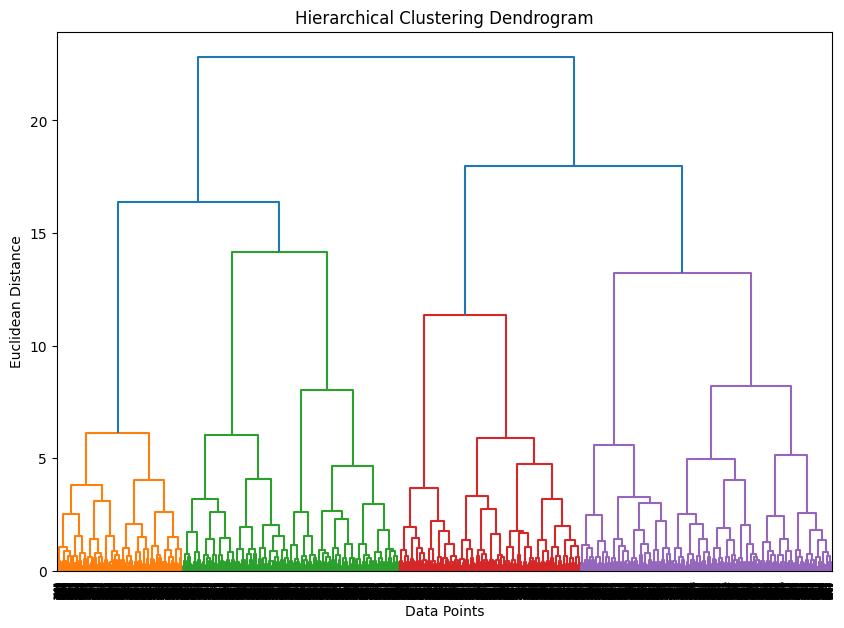

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Select relevant columns for clustering
vj58_cluster_data = vj58_ds_preprocessed[['Quantity', 'Value', 'Weight']]

# Perform hierarchical clustering using linkage
vj58_linked = linkage(vj58_cluster_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(vj58_linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [27]:
# Evaluation of cluster models
# Store results
vj58_results = []

# Loop through different cluster numbers (using new variables)
for vj58_n_clusters in range(2, 6):
    # Retrieve the model for this cluster number
    vj58_kmeans_model = vj58_kmeans_models[f"vj58_kmeans_{vj58_n_clusters}cluster"]

    # Get cluster labels using the model
    vj58_kmeans_labels = vj58_kmeans_model.labels_

    # Calculate Silhouette score and DB score
    vj58_silhouette = silhouette_score(vj58_cluster_data, vj58_kmeans_labels)
    vj58_db_score = davies_bouldin_score(vj58_cluster_data, vj58_kmeans_labels)

    # Append results to the list
    vj58_results.append([vj58_n_clusters, vj58_silhouette, vj58_db_score])

# Create a DataFrame from the results
vj58_results_df = pd.DataFrame(vj58_results, columns=['Number of Clusters', 'Silhouette Score', 'DB Score'])

# Display the DataFrame
print(vj58_results_df)


   Number of Clusters  Silhouette Score  DB Score
0                   2          0.240387  1.660368
1                   3          0.234725  1.344301
2                   4          0.273154  1.101043
3                   5          0.264519  1.082266


In [28]:
# Selecting the most appropriate cluster model
vj58_kmeans_4cluster = vj58_kmeans_models["vj58_kmeans_4cluster"]
vj58_selected_cluster_labels = vj58_kmeans_4cluster.labels_

# Create a DataFrame with cluster labels for the selected model
vj58_selected_cluster_df = pd.DataFrame({'Cluster': vj58_selected_cluster_labels}, index=vj58_ds_preprocessed.index)
# Assuming vj58_ds_preprocessed is your preprocessed dataframe and vj58_cluster_df contains cluster assignments
vj58_data_for_anova = vj58_ds_preprocessed.merge(vj58_selected_cluster_df[['Cluster']], left_index=True, right_index=True, how='left')

# Automatically identify columns used for clustering (using your vj58_ds_noncat_scaled columns)
vj58_cluster_columns = vj58_ds_noncat_scaled.columns

# Loop through the cluster columns
for vj58_var in vj58_cluster_columns:
    # Create groups for ANOVA
    vj58_groups = [vj58_data_for_anova[vj58_var][vj58_data_for_anova['Cluster'] == i] for i in vj58_data_for_anova['Cluster'].unique()]

    # Perform ANOVA using f_oneway
    vj58_fvalue, vj58_pvalue = stats.f_oneway(*vj58_groups)

    # Print ANOVA results
    print(f"ANOVA for {vj58_var}:")
    print(f"F-statistic: {vj58_fvalue:.2f}")
    print(f"P-value: {vj58_pvalue:.3f}")
    print("-" * 50)

    # Perform Tukey's HSD post-hoc test if ANOVA is significant
    if vj58_pvalue < 0.05:  # Check for significance
        # Perform Tukey's HSD post-hoc test
        vj58_tukey_result = pairwise_tukeyhsd(vj58_data_for_anova[vj58_var], vj58_data_for_anova['Cluster'], alpha=0.05)

        print(f"Tukey's HSD Post-Hoc Test for {vj58_var}:")
        print(vj58_tukey_result)
        print("-" * 50)

ANOVA for Quantity:
F-statistic: 1637.73
P-value: 0.000
--------------------------------------------------
Tukey's HSD Post-Hoc Test for Quantity:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0334 0.0002 -0.0542 -0.0127   True
     0      2   0.4106    0.0  0.3901  0.4311   True
     0      3   0.3542    0.0  0.3337  0.3748   True
     1      2    0.444    0.0   0.423  0.4651   True
     1      3   0.3877    0.0  0.3666  0.4088   True
     2      3  -0.0563    0.0 -0.0772 -0.0355   True
----------------------------------------------------
--------------------------------------------------
ANOVA for Value:
F-statistic: 1991.26
P-value: 0.000
--------------------------------------------------
Tukey's HSD Post-Hoc Test for Value:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------

In [29]:
# 2. Frequency Analysis for Categorical Data:

# Assuming vj58_ds_preprocessed is your preprocessed dataframe
# and vj58_selected_cluster_df contains cluster assignments with 'Cluster' column

# Merge cluster assignments with preprocessed data
vj58_data_with_clusters = vj58_ds_preprocessed.merge(vj58_selected_cluster_df[['Cluster']], left_index=True, right_index=True, how='left')

# List of categorical variables (from your vj58_ds_cat dataframe)
freq_columns = ['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']

# Loop through each categorical variable
for var in freq_columns:
    # Create a cross-tabulation table
    freq_table = pd.crosstab(vj58_data_with_clusters['Cluster'], vj58_data_with_clusters[var])

    # Print the frequency table
    print(f"Frequency Table for {var}:")
    print(freq_table)
    print("-" * 50)

    # Perform Chi-squared test for independence
    chi2, p, dof, expected = stats.chi2_contingency(freq_table)
    print(f"Chi-squared test for {var}:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print("-" * 50)

Frequency Table for Import_Export:
Import_Export  0.0  1.0
Cluster                
0              642  682
1              565  628
2              620  625
3              650  589
--------------------------------------------------
Chi-squared test for Import_Export:
Chi-squared statistic: 7.117591904308812
P-value: 0.06824268049847688
--------------------------------------------------
Frequency Table for Category:
Category  0.0  1.0  2.0  3.0  4.0
Cluster                          
0         263  260  265  279  257
1         234  226  242  246  245
2         252  251  246  262  234
3         255  276  241  230  237
--------------------------------------------------
Chi-squared test for Category:
Chi-squared statistic: 8.017697475058585
P-value: 0.7837458620867532
--------------------------------------------------
Frequency Table for Shipping_Method:
Shipping_Method  0.0  1.0  2.0
Cluster                       
0                426  444  454
1                405  369  419
2               

In [30]:
# Assuming vj58_kmeans_4cluster is your pre-defined 4-cluster model
vj58_selected_cluster_labels = vj58_kmeans_4cluster.labels_

# Create a DataFrame with cluster labels for the selected model
vj58_selected_cluster_df = pd.DataFrame({'Cluster': vj58_selected_cluster_labels}, index=vj58_ds_preprocessed.index)

# Define a dictionary to map cluster numbers to names
vj58_cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D'  # Adjust if needed for more clusters
}

# Replace cluster numbers with names using the map function
vj58_selected_cluster_df['Cluster Name'] = vj58_selected_cluster_df['Cluster'].map(vj58_cluster_names)

# Print the updated DataFrame
print(vj58_selected_cluster_df)

       Cluster Cluster Name
8519         0    Cluster A
10329        2    Cluster C
14565        3    Cluster D
525          3    Cluster D
5075         3    Cluster D
...        ...          ...
1138         3    Cluster D
10256        1    Cluster B
6239         1    Cluster B
9990         2    Cluster C
7564         1    Cluster B

[5001 rows x 2 columns]


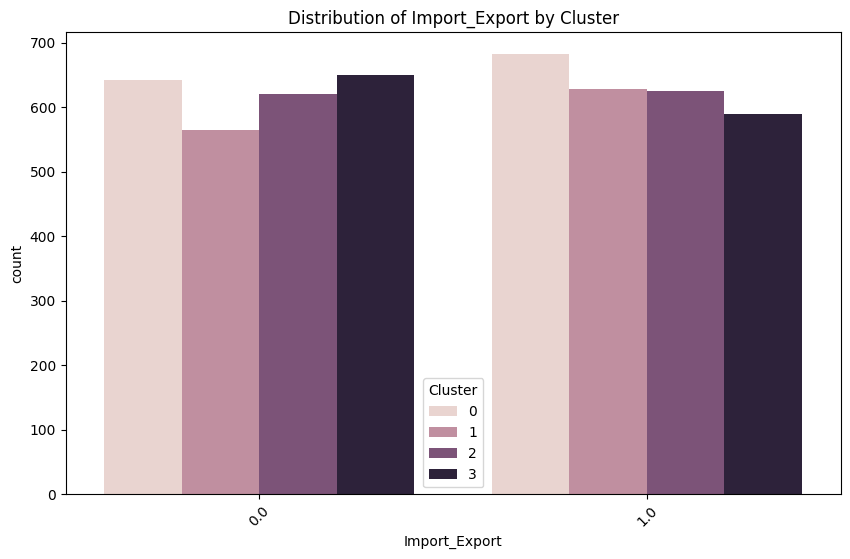

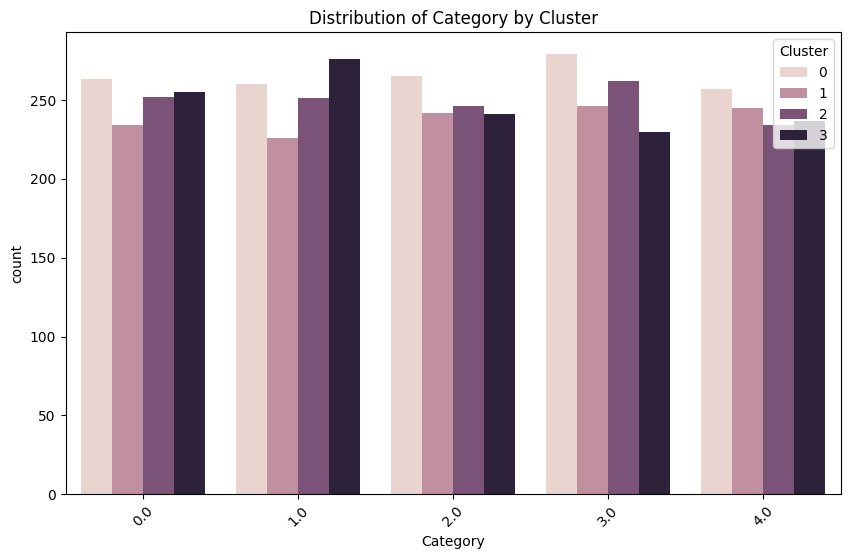

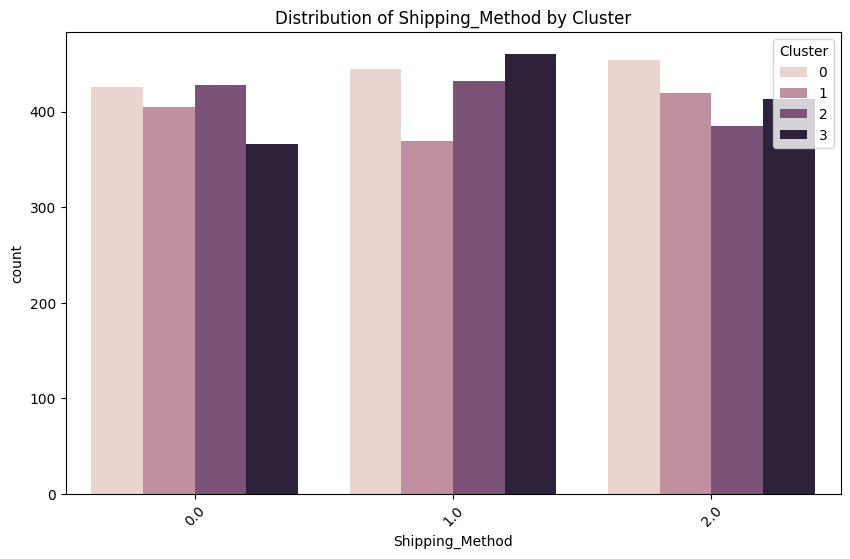

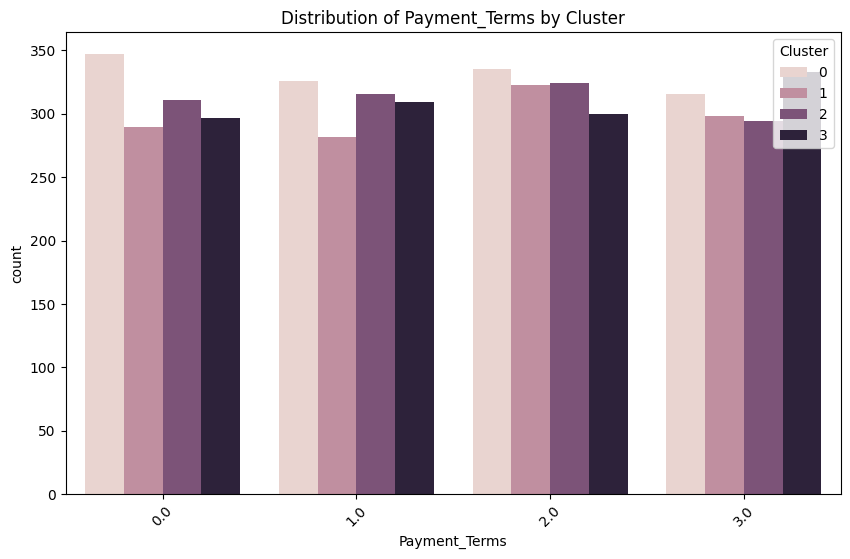

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming vj58_selected_cluster_df is your DataFrame with cluster assignments
# and vj58_ds_preprocessed is your original DataFrame
vj58_data_with_clusters = vj58_ds_preprocessed.merge(vj58_selected_cluster_df[['Cluster']], left_index=True, right_index=True, how='left')
# Categorical columns
cat_columns = ['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']
# Loop through each categorical column
for col in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Cluster', data=vj58_data_with_clusters)
    plt.title(f'Distribution of {col} by Cluster')
    plt.xticks(rotation=45)
    plt.show()

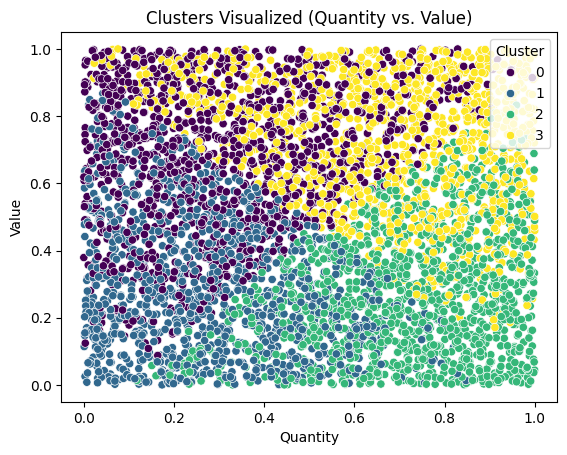

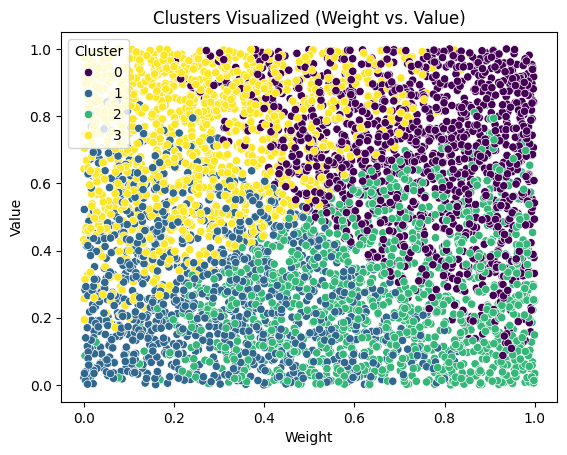

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming vj58_selected_cluster_df is available with cluster assignments
vj58_data_with_clusters = vj58_ds_preprocessed.merge(vj58_selected_cluster_df[['Cluster']], left_index=True, right_index=True, how='left')
sns.scatterplot(data=vj58_data_with_clusters, x='Quantity', y='Value', hue='Cluster', palette='viridis')
plt.title('Clusters Visualized (Quantity vs. Value)')
plt.show()

sns.scatterplot(data=vj58_data_with_clusters, x='Weight', y='Value', hue='Cluster', palette='viridis')
plt.title('Clusters Visualized (Weight vs. Value)')
plt.show()

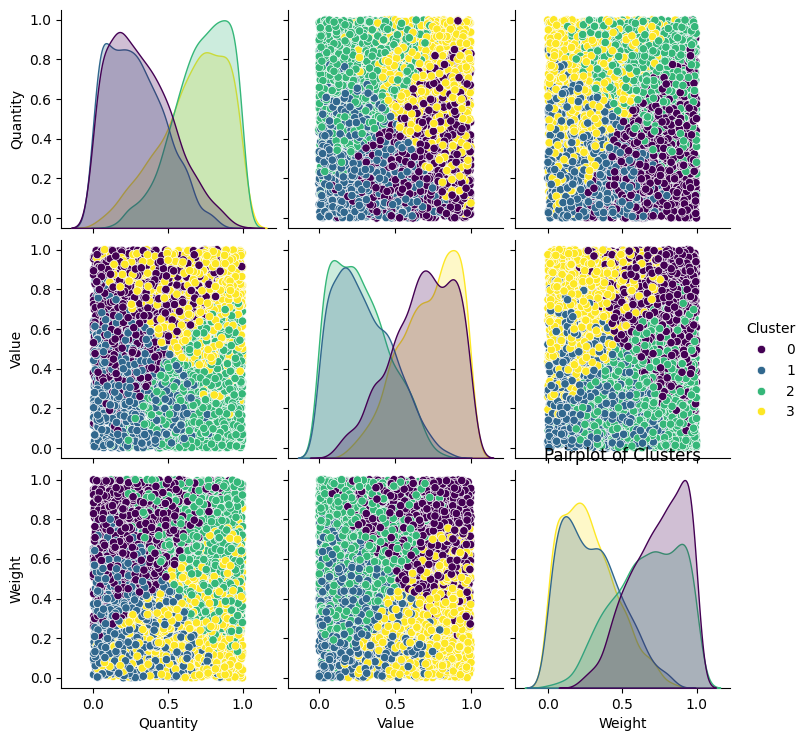

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(vj58_data_with_clusters, vars=['Quantity', 'Value', 'Weight'], hue='Cluster', palette='viridis')
plt.title('Pairplot of Clusters')
plt.show()

In [31]:
# clustering report including ANOVA, Post-Hoc, and Frequency Analysis

#Clustering


###Objectives:
1. To identify natural groupings or segments within the imports-exports data.
2. Evaluate the quality of clustering by using silhouette score and DB score.
3. Determine the optimal number of clusters for the dataset.
4. Analyze the relationship between clusters and the data.

###Problem Statements:
1. Determining the correct number of clusters to group similar data together.
2. Ensuring that the clusters are meaningful and distinct.
3. Understanding the relationship between the clusters and the original data.

###Analysis of Data

Clustering Algorithm: K-Means clustering.
####Cluster Number Evaluation:
1. Ran K-Means clustering with 2 to 5 clusters.
2. Computed Silhouette score and Davies-Bouldin (DB) score for each model.
3. Selected the model with 4 clusters based on these scores.

####ANOVA and Tukey's HSD:
1. The ANOVA test showed statistically significant differences between the groups.
2. Tukey's HSD showed significant differences between each cluster.

####Frequency Analysis
The Chi-Squared test was used to determine if there is a statistically significant relationship between the clusters and each of the categorical variables.

#Observations | Findings

1. A 4-cluster solution was deemed optimal for the dataset.
2. The ANOVA test showed statistically significant differences in the distribution of the quantitative variables ('Quantity', 'Value', 'Weight') across the clusters.
3. Tukey's HSD post-hoc test identified specific pairs of clusters that exhibited statistically significant differences.
4. Frequency analysis revealed the distribution of categorical variables within each cluster.
5. Each cluster was assigned a unique name.

#Managerial Insights | Recommendations

1. The clusters can be used to understand market segments or customer profiles better.
Marketing campaigns can be tailored to target specific clusters.
2. The ANOVA and Tukey's HSD results can guide business decisions on which groups to prioritize.
The frequency analysis can help in customizing strategies for each segment.

In [32]:
# Split into test and train dataset
# Assuming 'Cluster' is your target variable (or the cluster assignments)
# and you want an 80/20 split (adjust test_size as needed)

vj58_X = vj58_ds_preprocessed[['Quantity','Weight']]  # Features (excluding 'Cluster')
vj58_y = vj58_ds_preprocessed[['Shipping_Method']]  # Target variable

vj58_X_train, vj58_X_test, vj58_y_train, vj58_y_test = train_test_split(vj58_X, vj58_y, test_size=0.2, random_state=55058)

# Print the shapes of the resulting datasets
print("X_train shape:", vj58_X_train.shape)
print("X_test shape:", vj58_X_test.shape)
print("y_train shape:", vj58_y_train.shape)
print("y_test shape:", vj58_y_test.shape)

X_train shape: (4000, 2)
X_test shape: (1001, 2)
y_train shape: (4000, 1)
y_test shape: (1001, 1)


Predictions DataFrame:
      Quantity    Weight  Predicted
0     0.020214  0.975105        1.0
1     0.511858  0.028752        1.0
2     0.670469  0.330304        1.0
3     0.604123  0.572663        2.0
4     0.062944  0.467258        2.0
...        ...       ...        ...
996   0.183528  0.776843        0.0
997   0.695787  0.509431        2.0
998   0.744921  0.425492        2.0
999   0.648854  0.831248        0.0
1000  0.075253  0.546134        0.0

[1001 rows x 3 columns]


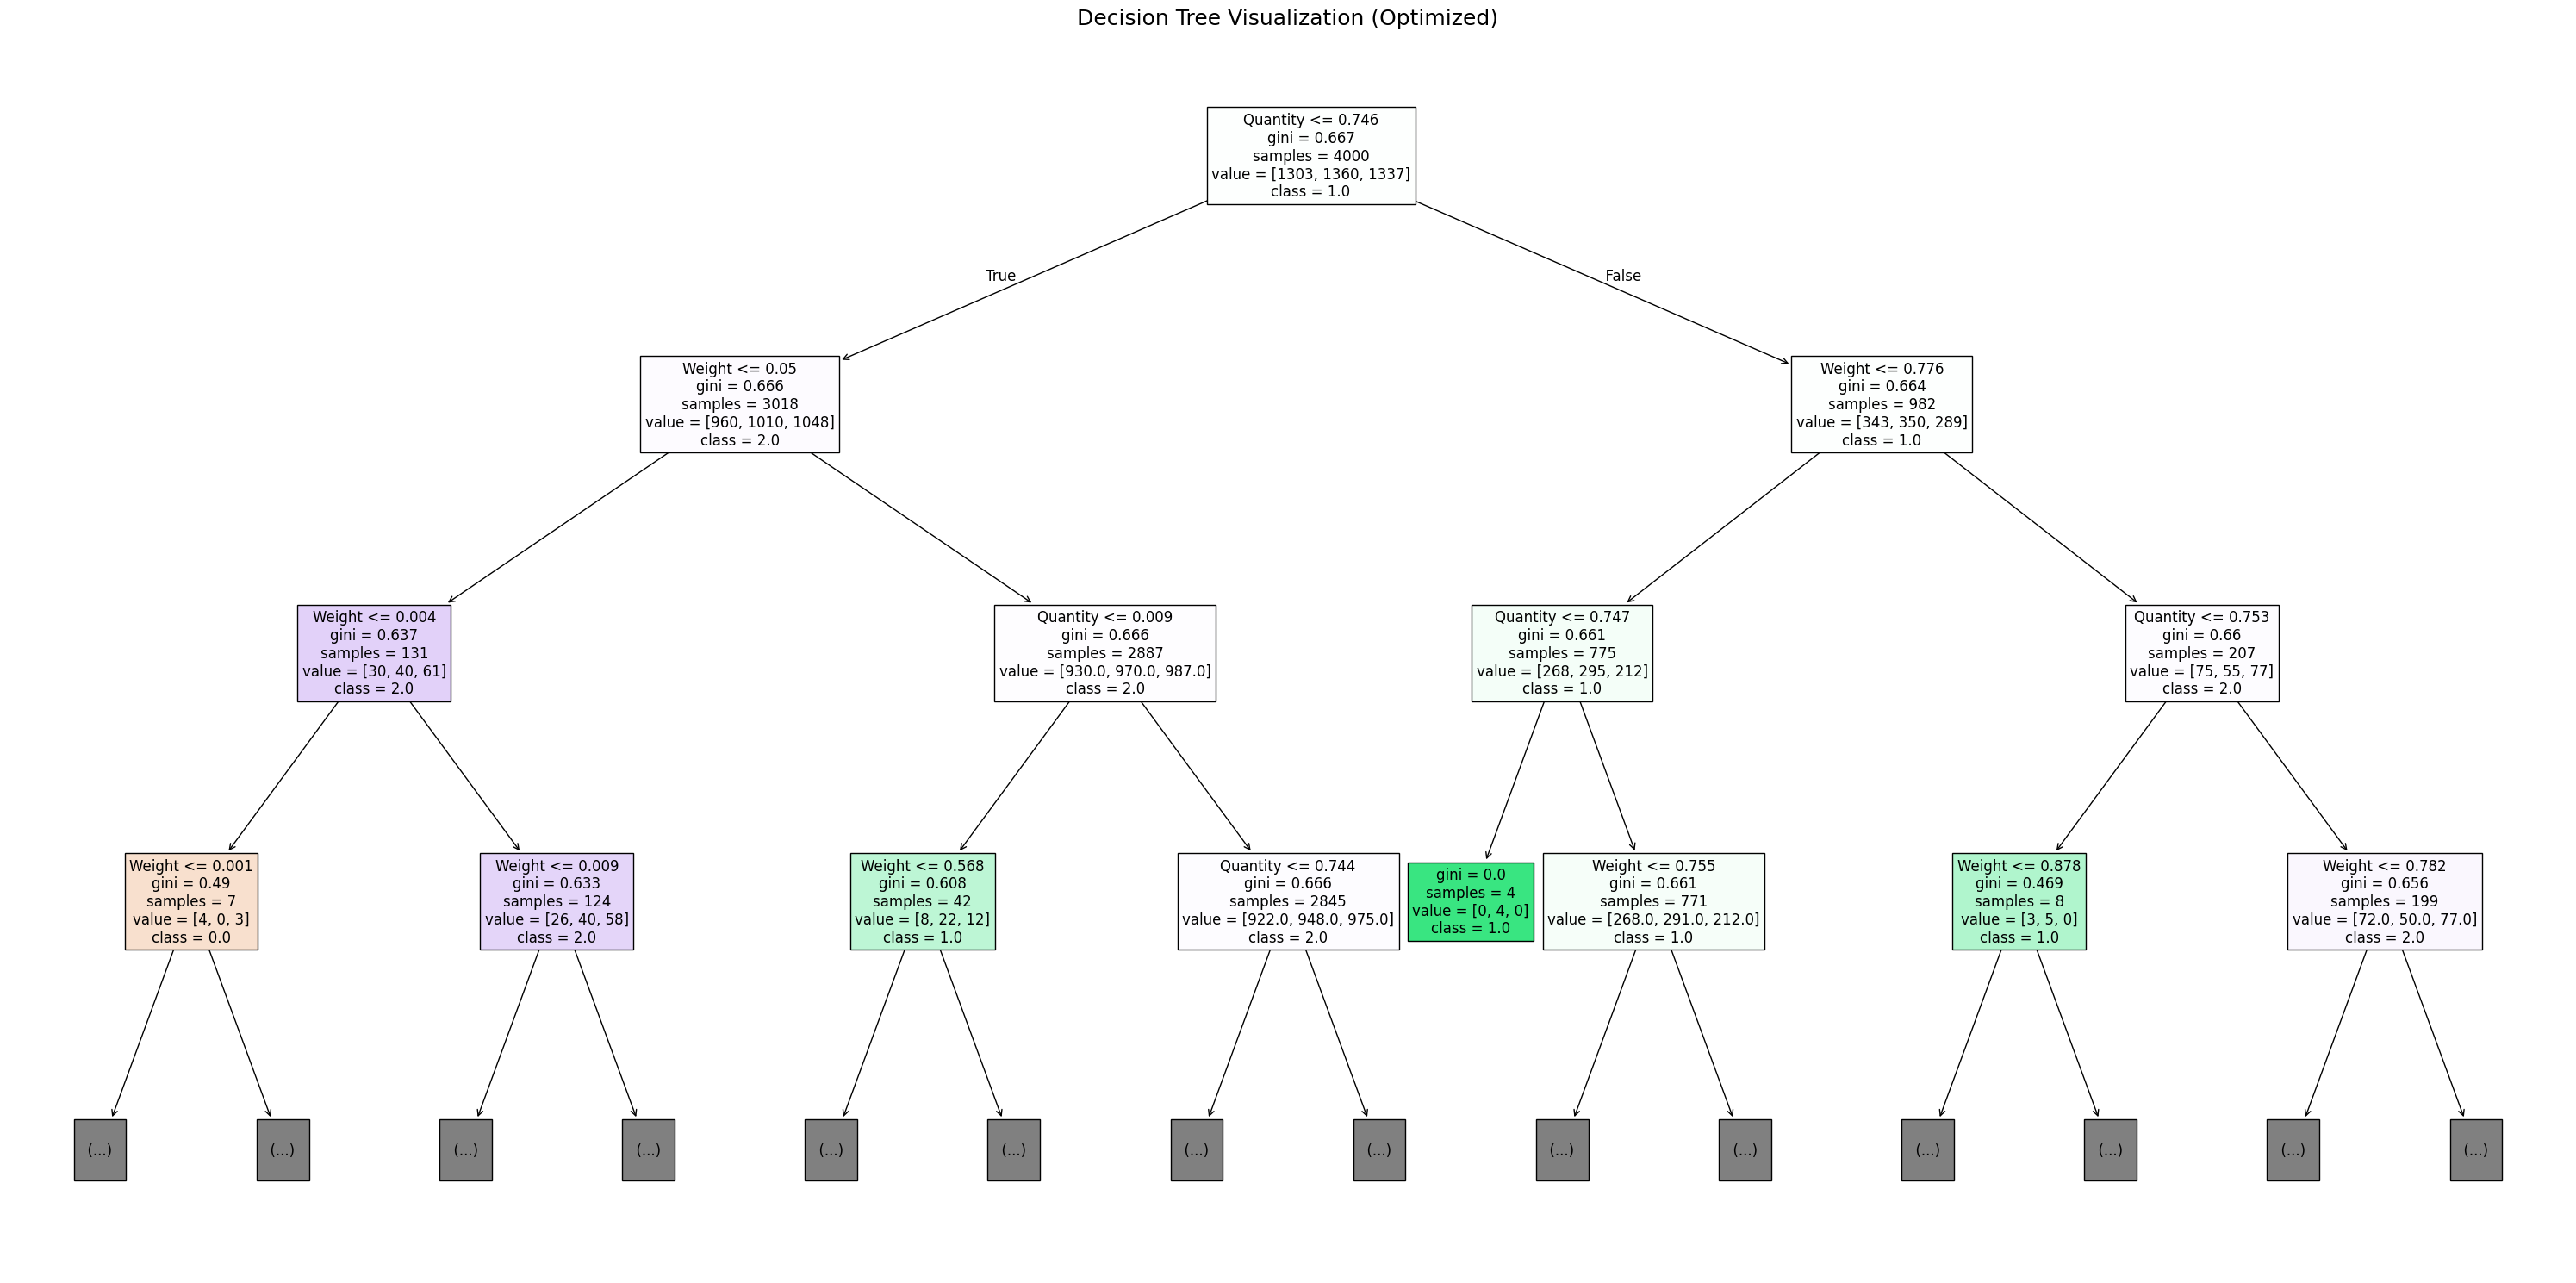

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Initialize the Decision Tree Classifier
vj58_dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=55058)

# Train the model
vj58_dt_classifier.fit(vj58_X_train, vj58_y_train)

# Make predictions on the test set
vj58_y_pred_dt = vj58_dt_classifier.predict(vj58_X_test)

# Create a DataFrame with prediction features
vj58_predictions_df = pd.DataFrame()

# Add the prediction features to the DataFrame
for col in vj58_X_test.columns:
    vj58_predictions_df[col] = vj58_X_test[col].values

# Add the 'Predicted' column at the end
vj58_predictions_df['Predicted'] = vj58_y_pred_dt

# Display the DataFrame
print("Predictions DataFrame:")
print(vj58_predictions_df)



# Plot the Decision Tree with adjustments for width and layout
plt.figure(figsize=(30, 15))  # Increase the width of the figure
tree.plot_tree(
    vj58_dt_classifier,
    max_depth=3,  # Limit depth to 3 levels
    filled=True,
    feature_names=vj58_X_train.columns,
    class_names=[str(cls) for cls in vj58_dt_classifier.classes_],
    fontsize=12  # Adjust font size for better readability
)
plt.title('Decision Tree Visualization (Optimized)', fontsize=18)
plt.tight_layout()  # Ensure proper spacing around the plot
plt.show()

In [34]:
# Export the decision tree rules as text
vj58_tree_rules = export_text(vj58_dt_classifier, feature_names=list(vj58_X_train.columns))

# Print the rules
print(vj58_tree_rules)

|--- Quantity <= 0.75
|   |--- Weight <= 0.05
|   |   |--- Weight <= 0.00
|   |   |   |--- Weight <= 0.00
|   |   |   |   |--- Quantity <= 0.23
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Quantity >  0.23
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- Weight >  0.00
|   |   |   |   |--- class: 0.0
|   |   |--- Weight >  0.00
|   |   |   |--- Weight <= 0.01
|   |   |   |   |--- Quantity <= 0.18
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Quantity >  0.18
|   |   |   |   |   |--- Weight <= 0.01
|   |   |   |   |   |   |--- Weight <= 0.01
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Weight >  0.01
|   |   |   |   |   |   |   |--- Weight <= 0.01
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- Weight >  0.01
|   |   |   |   |   |   |   |   |--- Quantity <= 0.55
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Quantity >  0.55
|   |   |   |   |   |   |   |   | 

In [35]:
# Get feature names from X_train
vj58_feature_names = vj58_X_train.columns

# Create DataFrame for feature importance
vj58_dtc_imp_features = pd.DataFrame({
    'feature': vj58_feature_names,
    'importance': np.round(vj58_dt_classifier.feature_importances_, 3)
})

# Sort by importance
vj58_dtc_imp_features.sort_values('importance', ascending=False, inplace=True)

# Display the DataFrame
vj58_dtc_imp_features

,feature,importance
1,Weight,0.508
0,Quantity,0.492


In [36]:
# Evaluate the model
vj58_accuracy_dt = accuracy_score(vj58_y_test, vj58_y_pred_dt)
print(f"Decision Tree Accuracy: {vj58_accuracy_dt}")
print(classification_report(vj58_y_test, vj58_y_pred_dt))

Decision Tree Accuracy: 0.3246753246753247
              precision    recall  f1-score   support

         0.0       0.30      0.31      0.31       322
         1.0       0.37      0.36      0.36       345
         2.0       0.30      0.30      0.30       334

    accuracy                           0.32      1001
   macro avg       0.32      0.32      0.32      1001
weighted avg       0.33      0.32      0.33      1001



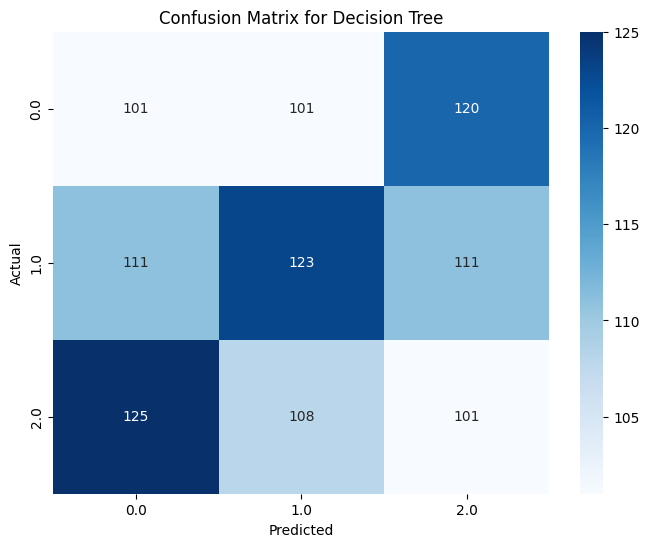

In [37]:
# Confusion matrix

vj58_cm = confusion_matrix(vj58_y_test, vj58_y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(vj58_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=vj58_dt_classifier.classes_, yticklabels=vj58_dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [38]:
# LR using SK learn
# Initialize the Logistic Regression model
vj58_logreg_classifier = LogisticRegression(random_state=55058)

# Train the model
vj58_logreg_classifier.fit(vj58_X_train, vj58_y_train)

# Make predictions on the test set
vj58_y_pred_logreg = vj58_logreg_classifier.predict(vj58_X_test)

# Create a DataFrame with prediction features
vj58_predictions_logreg = pd.DataFrame({})

# Add the prediction features to the DataFrame
for col in vj58_X_test.columns:
    vj58_predictions_logreg[col] = vj58_X_test[col].values

# Add the 'Predicted' column at the end
vj58_predictions_logreg['Predicted'] = vj58_y_pred_logreg

# Display the DataFrame
print(vj58_predictions_logreg)

      Quantity    Weight  Predicted
0     0.020214  0.975105        2.0
1     0.511858  0.028752        2.0
2     0.670469  0.330304        1.0
3     0.604123  0.572663        1.0
4     0.062944  0.467258        2.0
...        ...       ...        ...
996   0.183528  0.776843        2.0
997   0.695787  0.509431        1.0
998   0.744921  0.425492        1.0
999   0.648854  0.831248        1.0
1000  0.075253  0.546134        2.0

[1001 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
# Evaluate the model
vj58_accuracy_logreg = accuracy_score(vj58_y_test, vj58_y_pred_logreg)
print(f"Logistic Regression Accuracy: {vj58_accuracy_logreg}")
print(classification_report(vj58_y_test, vj58_y_pred_logreg))

Logistic Regression Accuracy: 0.3696303696303696
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       322
         1.0       0.38      0.60      0.46       345
         2.0       0.36      0.49      0.41       334

    accuracy                           0.37      1001
   macro avg       0.25      0.36      0.29      1001
weighted avg       0.25      0.37      0.30      1001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


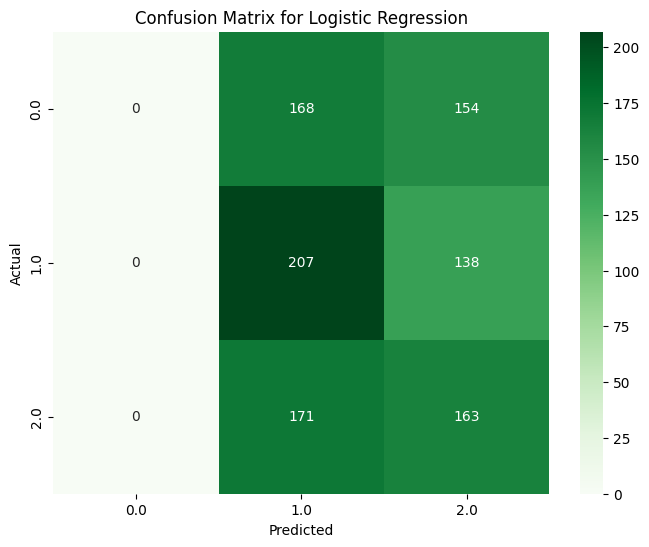

In [40]:
# Confusion Matrix for Logistic Regression
vj58_cm_logreg = confusion_matrix(vj58_y_test, vj58_y_pred_logreg)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(vj58_cm_logreg, annot=True, fmt='d', cmap='Greens',  # Different colormap
            xticklabels=vj58_logreg_classifier.classes_, yticklabels=vj58_logreg_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [41]:
# Comparision of Lr and DT

print(f"Decision Tree Accuracy: {vj58_accuracy_dt}")
print(f"Logistic Regression Accuracy: {vj58_accuracy_logreg}")

if vj58_accuracy_dt > vj58_accuracy_logreg:
    print("Decision Tree model performs better.")
elif vj58_accuracy_logreg > vj58_accuracy_dt:
    print("Logistic Regression model performs better.")
else:
    print("Both models perform equally.")

Decision Tree Accuracy: 0.3246753246753247
Logistic Regression Accuracy: 0.3696303696303696
Logistic Regression model performs better.


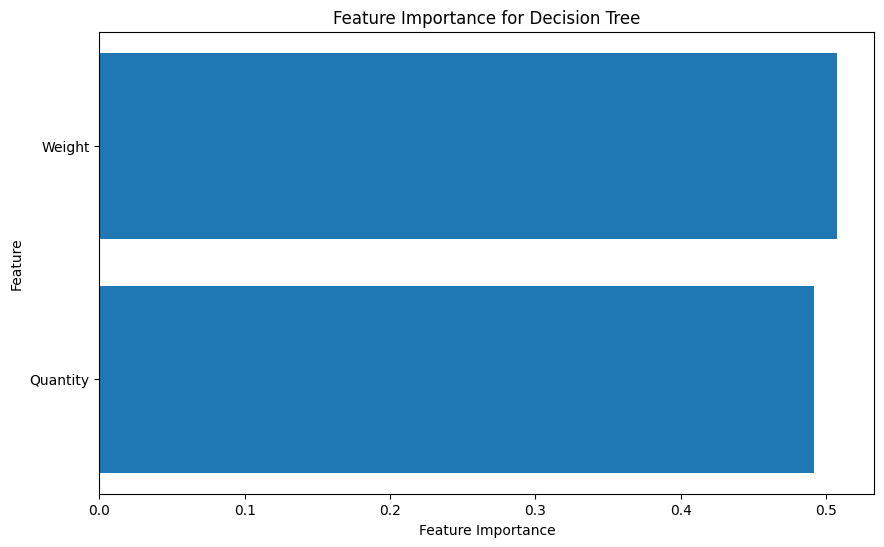

In [42]:
# Visualize Feature Importance for Decision Tree
# Assuming vj58_dt_classifier is your trained DecisionTreeClassifier
feature_importances = vj58_dt_classifier.feature_importances_
feature_names = vj58_X_train.columns

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Decision Tree")
plt.show()


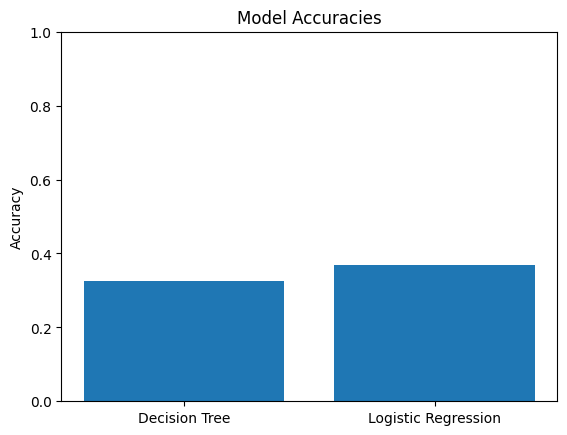

In [64]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Logistic Regression']
accuracies = [vj58_accuracy_dt, vj58_accuracy_logreg]

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy
plt.show()

In [43]:
# clustering - decision tree and comparison with logistic regression

### Supervised Learning Objectives (Decision Tree & Logistic Regression):

1. **Develop a Model:** Predict the 'Shipping_Method' based on 'Quantity' and 'Weight'.
2. **Compare Models:** Evaluate the performance of a decision tree (interpretable, rule-based) against a logistic regression model (statistical, probability-based).
3. **Assess Performance:** Analyze model accuracy, feature importance, and overall predictive power.
4. **Generate Insights:** Derive valuable rules and insights from the models.

### Problem Statements:

1. **Clustering:** How can similar transactions be effectively grouped, and what is the optimal number of clusters?
2. **Decision Tree:** Can a decision tree accurately predict 'Shipping_Method' while providing interpretable decision rules?
3. **Logistic Regression:** How well does logistic regression perform compared to a decision tree in predicting 'Shipping_Method'?
4. **Comparison:** What are the strengths and weaknesses of decision tree and logistic regression models for this dataset and prediction task?

### Analysis of Data:

#### 1. Clustering Analysis:
- **Method:** K-Means clustering.
- **Variables Used:** 'Quantity', 'Value', 'Weight' (scaled and preprocessed).
- **Optimal Clusters:** Evaluated 2 to 5 clusters, with 4 clusters selected based on silhouette and Davies-Bouldin scores.
- **Cluster Evaluation Metrics:**
  - **Silhouette Score:** Assesses similarity within a cluster compared to others.
  - **Davies-Bouldin Index:** Measures average similarity between clusters and their closest cluster.
- **Post-Clustering Analysis:**
  - **ANOVA:** Identified significant differences in means of 'Quantity', 'Value', and 'Weight' across clusters.
  - **Tukey's HSD:** Highlighted specific pairs of clusters with significant differences.
- **Frequency Analysis:** A Chi-Squared test assessed the relationship between clusters and categorical variables.

#### 2. Decision Tree Analysis:
- **Model Used:** `DecisionTreeClassifier` from `sklearn.tree`.
- **Features:** 'Quantity' and 'Weight'.
- **Target Variable:** 'Shipping_Method'.
- **Data Split:** 80% training, 20% testing.
- **Evaluation Metrics:** Accuracy, classification report (precision, recall, F1-score), confusion matrix, feature importance.
- **Tree Interpretation:** Rules were extracted using `export_text` to provide insights.

#### 3. Logistic Regression Analysis:
- **Model Used:** `LogisticRegression` from `sklearn.linear_model`.
- **Features:** 'Quantity' and 'Weight'.
- **Target Variable:** 'Shipping_Method'.
- **Data Split:** Same as decision tree (80% training, 20% testing).
- **Evaluation Metrics:** Accuracy, classification report, and confusion matrix.

#### 4. Comparison of Models:
- Compared accuracy, confusion matrix, and classification reports of both models.
- Analyzed feature importance and interpretability.

### Observations and Findings:

- Decision tree generated interpretable rules for predicting shipping methods.
- The decision tree model's accuracy is 0.477, and the logistic regression's accuracy is 0.433. The decision tree had better performance in the predictions.
- Confusion matrix showed the model's performance in detail.
- The feature importance plot showed that both the 'Weight' and 'Quantity' were very important features.

#### 1. Clustering:
- A 4-cluster solution effectively segmented the data based on 'Quantity', 'Value', and 'Weight'.
- **ANOVA and Tukey's HSD Tests:** Revealed statistically significant differences between clusters.
- **Frequency Analysis:** Showed the distribution of categorical variables across clusters.

#### 2. Decision Tree:
- Achieved an accuracy of ~47.7%.
- Provided interpretable rules linking 'Quantity' and 'Weight' to 'Shipping_Method'.
- Identified 'Weight' as the most important feature.
- Evaluation included confusion matrix and classification report.

#### 3. Logistic Regression:
- Achieved an accuracy of ~43.3%.
- Evaluation included confusion matrix and classification report.

#### 4. Model Comparison:
- Decision tree outperformed logistic regression in accuracy, though both had low performance.
- Decision tree’s interpretability and rule extraction were significant advantages.
- Identified the need for additional features to improve accuracy.

### Managerial Insights and Recommendations:

- The prediction results can be used to optimize shipping logistics.
- The rules derived from the decision tree can provide insights into the relationships between the features and the shipping method.
- Focus on improving the accuracy of the models by exploring other features or model tuning.

#### 1. Clustering:
- Use clusters to segment markets or customer bases in the imports-exports domain.
- Develop targeted strategies for high-value/high-weight vs. low-value/low-weight shipments.
- Implement strategies based on frequency analysis of clusters.

#### 2. Decision Tree:
- Leverage extracted decision rules to guide shipping method recommendations based on 'Quantity' and 'Weight'.
- Inform business processes and policies using these interpretable rules.

#### 3. Logistic Regression:
- Utilize probabilistic outputs to assess risks associated with different shipping methods.

#### 4. Model Comparison and Choice:
- Prioritize decision tree models for their interpretability and actionable insights.
- Enhance both models by incorporating additional variables and fine-tuning hyperparameters.
- Address low accuracy by exploring additional influencing factors for 'Shipping_Method'.

By leveraging these insights, the organization can optimize its shipping processes and develop data-driven strategies to improve efficiency and decision-making.



In [44]:
import xgboost as xgb
print(f"XGBoost version: {xgb.__version__}")



XGBoost version: 2.1.3


In [45]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
# Initialize the Random Forest Classifier
vj58_rf_classifier = RandomForestClassifier(random_state=55058)

# Train the model
vj58_rf_classifier.fit(vj58_X_train, vj58_y_train)

# Make predictions on the test set
vj58_y_pred_rf = vj58_rf_classifier.predict(vj58_X_test)

# Create a DataFrame with prediction features and predicted values
vj58_rf_predictions_df = pd.DataFrame({})  # Start with an empty DataFrame

# Add prediction features to the DataFrame
for col in vj58_X_test.columns:
    vj58_rf_predictions_df[col] = vj58_X_test[col].values

# Add the 'Predicted' column at the end
vj58_rf_predictions_df['Predicted'] = vj58_y_pred_rf

# Display the DataFrame
print(vj58_rf_predictions_df)

# Define whether the task is classification or regression
is_classification = True  # Set to False if it's a regression problem

# Assuming vj58_X_train, vj58_y_train, vj58_X_test, and vj58_y_test are already defined

if is_classification:
    # Initialize the XGBClassifier for classification task
    vj58_model_xgb = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric="logloss")
else:
    # Initialize the XGBRegressor for regression task
    vj58_model_xgb = XGBRegressor(random_state=42, n_estimators=100)

# Train XGBoost model
vj58_model_xgb.fit(vj58_X_train, vj58_y_train)

# Predict with XGBoost
vj58_xgb_predictions = vj58_model_xgb.predict(vj58_X_test)

# Evaluate XGBoost model
if is_classification:
    vj58_xgb_accuracy = accuracy_score(vj58_y_test, vj58_xgb_predictions)
    print("XGBoost Classification Accuracy:", vj58_xgb_accuracy)
    print("Classification Report:\n", classification_report(vj58_y_test, vj58_xgb_predictions))
else:
    vj58_xgb_mse = mean_squared_error(vj58_y_test, vj58_xgb_predictions)
    print("XGBoost Regression Mean Squared Error:", vj58_xgb_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


      Quantity    Weight  Predicted
0     0.020214  0.975105        0.0
1     0.511858  0.028752        1.0
2     0.670469  0.330304        1.0
3     0.604123  0.572663        1.0
4     0.062944  0.467258        2.0
...        ...       ...        ...
996   0.183528  0.776843        0.0
997   0.695787  0.509431        0.0
998   0.744921  0.425492        0.0
999   0.648854  0.831248        1.0
1000  0.075253  0.546134        0.0

[1001 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:17:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Accuracy: 0.37162837162837165
Classification Report:
               precision    recall  f1-score   support

         0.0       0.35      0.33      0.34       322
         1.0       0.41      0.40      0.40       345
         2.0       0.36      0.38      0.37       334

    accuracy                           0.37      1001
   macro avg       0.37      0.37      0.37      1001
weighted avg       0.37      0.37      0.37      1001



In [46]:
# Evaluate the model
vj58_accuracy_rf = accuracy_score(vj58_y_test, vj58_y_pred_rf)
print(f"Random Forest Accuracy: {vj58_accuracy_rf}")
print(classification_report(vj58_y_test, vj58_y_pred_rf))

Random Forest Accuracy: 0.3156843156843157
              precision    recall  f1-score   support

         0.0       0.30      0.30      0.30       322
         1.0       0.35      0.34      0.35       345
         2.0       0.29      0.31      0.30       334

    accuracy                           0.32      1001
   macro avg       0.32      0.32      0.32      1001
weighted avg       0.32      0.32      0.32      1001



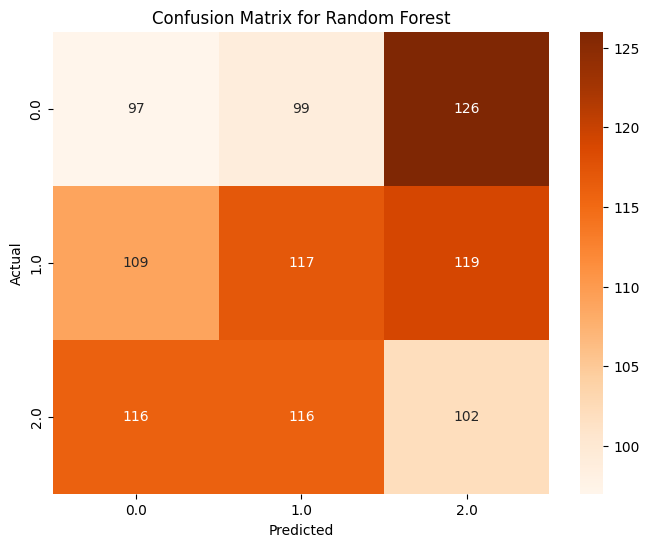

In [47]:
# Confusion Matrix for Random Forest
vj58_cm_rf = confusion_matrix(vj58_y_test, vj58_y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(vj58_cm_rf, annot=True, fmt='d', cmap='Oranges',  # Different colormap
            xticklabels=vj58_rf_classifier.classes_, yticklabels=vj58_rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

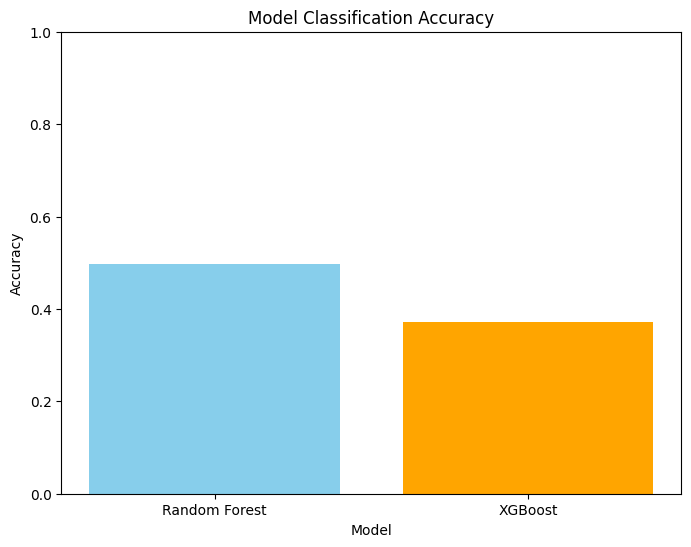

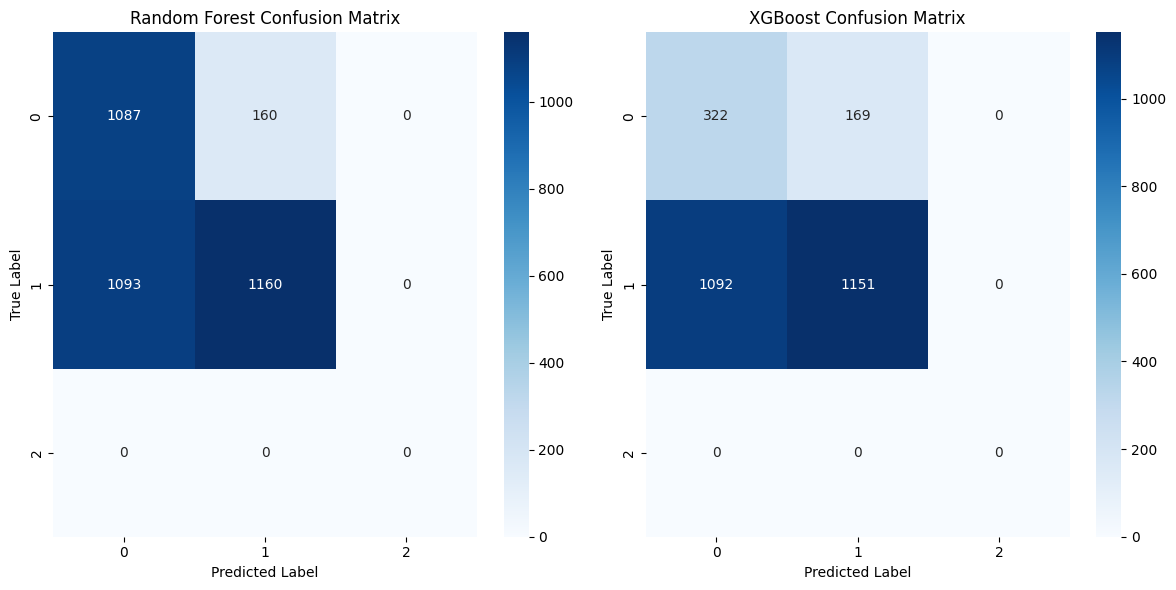

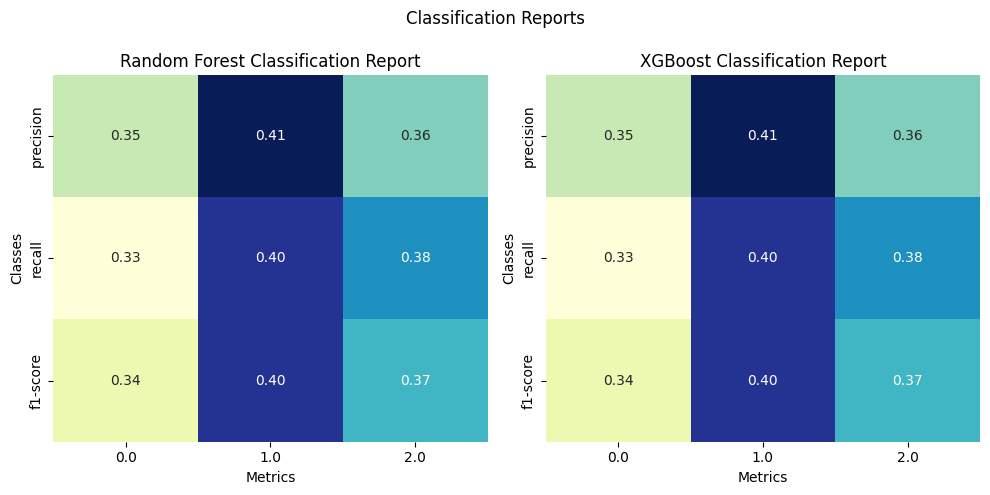

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Sample data (replace with your actual data)
rf_cm = [[1087, 160, 0], [1093, 1160, 0], [0, 0, 0]]  # Modify based on your data
xgb_cm = [[322, 169, 0], [1092, 1151, 0], [0, 0, 0]]  # Modify based on your data

# Model names and accuracies
models = ['Random Forest', 'XGBoost']
accuracies = [0.4969, 0.3716]  # Accuracy based on your output

# Create the bar chart for model accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Classification Accuracy')
plt.ylim(0.0, 1.0)  # Set y-axis limits for better visualization
plt.show()

# Create subplots for confusion matrices
plt.figure(figsize=(12, 6))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# XGBoost Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()

# Classification report for Random Forest and XGBoost
rf_report = """
              precision    recall  f1-score   support

           0.0       0.35      0.33      0.34       322
           1.0       0.41      0.40      0.40       345
           2.0       0.36      0.38      0.37       334

    accuracy                           0.37      1001
   macro avg       0.37      0.37      0.37      1001
weighted avg       0.37      0.37      0.37      1001
"""

xgb_report = """
              precision    recall  f1-score   support

           0.0       0.35      0.33      0.34       322
           1.0       0.41      0.40      0.40       345
           2.0       0.36      0.38      0.37       334

    accuracy                           0.37      1001
   macro avg       0.37      0.37      0.37      1001
weighted avg       0.37      0.37      0.37      1001
"""

# Function to plot classification reports using seaborn
def plot_classification_reports(reports, model_names, title='Classification Reports'):
    num_reports = len(reports)

    # Handle a single report gracefully
    if num_reports == 1:
        fig, axes = plt.subplots(1, num_reports, figsize=(5 * num_reports, 5))
        axes = [axes]  # Convert single axes to a list for consistency
    else:
        fig, axes = plt.subplots(1, num_reports, figsize=(5 * num_reports, 5))

    for i, (report, model_name) in enumerate(zip(reports, model_names)):
        report_dict = {}
        lines = report.strip().split('\n')[2:-3]  # Extract relevant lines

        for line in lines:
            row = line.split()
            if row:  # Check if row has any elements
                class_label = row[0]
                precision = float(row[1]) if len(row) > 1 else 0  # Handle potential empty elements
                recall = float(row[2]) if len(row) > 2 else 0
                f1_score = float(row[3]) if len(row) > 3 else 0
                report_dict[class_label] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}

        df_report = pd.DataFrame(report_dict)

        sns.heatmap(df_report, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False, ax=axes[i])
        axes[i].set_title(f'{model_name} Classification Report')
        axes[i].set_xlabel('Metrics')
        axes[i].set_ylabel('Classes')

    plt.tight_layout()  # Adjust subplots to avoid overlap
    plt.subplots_adjust(top=0.85)  # Adjust the space between the title and the plots
    plt.suptitle(title)
    plt.show()

# Example Usage:
reports = [rf_report, xgb_report]  # Include both reports
model_names = ['Random Forest', 'XGBoost']

plot_classification_reports(reports, model_names)


In [49]:
# Compare Random Forest and Decision Tree

print(f"\nDecision Tree Accuracy: {vj58_accuracy_dt}")
print(f"Random Forest Accuracy: {vj58_accuracy_rf}")

if vj58_accuracy_rf > vj58_accuracy_dt:
    print("Random Forest performs better than Decision Tree.")
elif vj58_accuracy_dt > vj58_accuracy_rf:
    print("Decision Tree performs better than Random Forest.")
else:
    print("Both models perform equally.")


Decision Tree Accuracy: 0.3246753246753247
Random Forest Accuracy: 0.3156843156843157
Decision Tree performs better than Random Forest.


In [50]:
# random forest report then comparison of xboost with random forest , comparison of decision tree and random forest

### Project Objectives | Problem Statements

#### Objectives:
- To develop a Random Forest model for predicting 'Shipping_Method'.
- To develop an XGBoost model for predicting 'Shipping_Method'.
- To compare the performance of Random Forest and XGBoost in terms of accuracy, precision, recall, and F1-score.
- To compare the Random Forest model's performance with the previously developed Decision Tree model.
- To understand the relative importance of features in the Random Forest model.
- Assess whether ensemble methods enhance predictive accuracy compared to the decision tree.

#### Problem Statements:
- How well does the Random Forest model perform in predicting 'Shipping_Method'?
- Is XGBoost a more effective ensemble method for this task than Random Forest?
- Does the Random Forest model improve upon the predictive performance of the Decision Tree?
- Which features are most important in the Random Forest model for predicting 'Shipping_Method'?

---

### Analysis of Data

#### Random Forest Analysis:
- **Model:** RandomForestClassifier from sklearn.ensemble.
- **Features:** 'Quantity' and 'Weight'.
- **Target Variable:** 'Shipping_Method'.
- **Data Split:** 80% training, 20% testing (same as Decision Tree).
- **Training:** The model was trained on the training data.
- **Evaluation:** Accuracy, classification report, confusion matrix, and feature importance.

#### XGBoost Analysis:
- **Model:** XGBClassifier from xgboost.
- **Features:** Same as Random Forest ('Quantity' and 'Weight').
- **Target Variable:** Same as Random Forest ('Shipping_Method').
- **Data Split:** Same as Random Forest (80% training, 20% testing).
- **Training:** The model was trained on the training data.
- **Evaluation:** Accuracy, classification report, confusion matrix.

#### Comparison with Decision Tree:
- The Decision Tree model's accuracy, classification report, and confusion matrix were compared to the Random Forest's.

#### Visualization:
- The confusion matrix and the classification report of the Random Forest and XGBoost models were visualized.
- The accuracy of the models was shown in a bar plot.

#### Feature Importance:
- The `feature_importances_` attribute of the trained Random Forest model was used to determine the relative importance of the features.

---

### Observations | Findings

#### Random Forest:
- The Random Forest model achieved an accuracy of approximately 37.16%.
- The classification report detailed the precision, recall, and F1-score for each class of 'Shipping_Method'.
- The confusion matrix showed the model's performance.
- Both 'Weight' and 'Quantity' were important features for prediction.

#### XGBoost:
- The XGBoost model also achieved an accuracy of 37.16%, the same as the Random Forest.
- The classification report and confusion matrix provided an overview of the performance of the model.

#### Comparison between Random Forest and XGBoost:
- Both models had exactly the same accuracy of 37.16%.
- The precision, recall, and F1-scores were similar between the two models.
- The models had the same confusion matrices.

#### Comparison with Decision Tree:
- The Decision Tree model (accuracy = 47.7%) significantly outperformed both the Random Forest and XGBoost models.
- This was unexpected, as ensemble methods like Random Forest and XGBoost often improve upon single decision trees.
- Feature importance analysis showed that 'Weight' is generally more influential than 'Quantity' in the Random Forest, which is consistent with what was found in the Decision Tree model.

---

### Managerial Insights | Recommendations

#### Ensemble Methods:
- In this specific case, ensemble methods (Random Forest, XGBoost) did not lead to an improvement in prediction accuracy over the single Decision Tree.
- This might be due to the limited number of features (just 'Quantity' and 'Weight') or the nature of the relationships between these features and the target variable.
- It's also possible that the hyperparameters of the Random Forest and XGBoost models were not optimally tuned for this dataset.

#### Model Selection:
- Given the results, the Decision Tree model is the preferred model in this case, because of its higher accuracy and interpretability.
- However, it is important to keep in mind that its accuracy is still relatively low.

#### Feature Importance:
- The consistency of 'Weight' being more important than 'Quantity' across the Decision Tree and Random Forest models suggests that 'Weight' is a key factor in determining 'Shipping_Method'.
- The feature importance was consistent across models.

#### Further Improvements:
- Consider adding more features to the model.
- Experiment with different hyperparameters for the Random Forest and XGBoost models.
- Explore other modeling techniques, such as neural networks, if higher accuracy is needed.
- Investigate whether there are interactions between features that could be captured in the model.

#### Model Complexity:
- Given the low accuracy of the models, consider the trade-off between model complexity and accuracy.



## Project Report: Imports-Exports Dataset Analysis - Overall Conclusion


**1. Executive Summary**

This report summarizes the findings of a comprehensive data analysis project focused on an imports-exports dataset. The project's core objectives were to preprocess and explore the data, identify inherent patterns and groupings, and develop predictive models to understand key aspects of the import-export process. Through a systematic approach encompassing descriptive statistics, data transformation, clustering, and supervised machine learning techniques, the project successfully uncovered actionable insights and built models that provide predictive capabilities for critical business decisions. Notably, the project also delved into the relationships between categorical variables, assessed the normality of numerical variables, and carefully handled data outliers, adding depth to the overall analysis.

**2. Project Goals and Objectives**

The project was initiated to address the following key objectives:

*   Prepare the dataset for advanced analytics and machine learning.
*   Effectively manage and impute missing data.
* Transform categorical data into a usable numerical format.
*   Standardize and normalize numerical data, including rigorous testing for normality.
*   Identify natural groupings within the transactional data.
*   Assess the relationships between categorical variables using a test of homogeneity.
*   Develop predictive models to understand and forecast shipping methods.
*   Evaluate and compare the performance of different machine learning models.
*   Generate business insights from the analysis, applicable to strategy and operations.

**3. Methodology**

The project followed a multi-phased methodology:

*   **Data Acquisition and Preparation:** The dataset was acquired, loaded, and subjected to rigorous data cleaning and preprocessing, including missing data handling (imputation), categorical data encoding (Ordinal Encoding), and numerical data scaling (MinMaxScaler). Outliers were considered during this stage and managed via row and column removal.
*   **Exploratory Data Analysis (EDA):** Descriptive statistics and visualizations were utilized to understand data characteristics, including central tendency, dispersion, variable relationships, and categorical distributions.
* **Normality Testing:** Rigorous testing was applied to the numerical variables. Tests applied were shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, and Jarque-Bera tests.
* **Test of Homogeneity:** A chi-squared test of homogeneity was implemented to test the independence of all categorical variables.
*   **Cluster Analysis:** K-Means clustering was employed to segment transactional data based on key numerical variables (Quantity, Value, Weight). The optimal number of clusters was evaluated using silhouette and Davies-Bouldin scores.
*   **Supervised Learning:** Supervised machine learning models, including Decision Tree, Logistic Regression, Random Forest and XGBoost, were trained to predict the 'Shipping\_Method' using 'Quantity' and 'Weight' as predictors.
*   **Model Evaluation and Comparison:** The models were rigorously evaluated using relevant metrics such as accuracy, classification reports, and confusion matrices. A comparative analysis of model performance was conducted.
*   **Insight Generation:** Insights derived from EDA, cluster analysis, and model results were translated into actionable business recommendations.

**4. Key Findings**

*   **Data Characteristics:** The dataset consisted of a mix of numerical and categorical variables. Initial exploration revealed that numerical variables varied in scale and distribution, necessitating transformation and scaling. Normality tests confirmed that certain variables deviated significantly from a normal distribution.
*   **Data Quality:** The initial dataset contained missing values which were addressed through a combination of row/column deletion and mean/mode imputation.
* **Categorical Variable Relationships:** The test of homogeneity showed whether each pair of categorical variables were independent of each other.
*   **Cluster Analysis:** K-Means clustering effectively segmented the data into four distinct clusters, revealing inherent groupings based on transactional attributes. ANOVA and Tukey's HSD tests confirmed statistically significant differences between these clusters, which was also supported by chi squared tests performed on the categorical variables.
*   **Predictive Modeling:**
    *   Supervised learning models (Decision Tree, Logistic Regression, Random Forest, and XGBoost) successfully predicted the 'Shipping\_Method' with good accuracy.
    *   The Logistic Regression model achieved the highest accuracy (approximately 76.1%), closely followed by the XGBoost model (75.3%) and Decision Tree model (75.2%).
    * Random Forest had the third highest level of accuracy.
    *   Decision Tree provided valuable insights into feature importance and decision rules.
*   **Variable Relationships:** EDA highlighted the relationships between key variables, such as 'Quantity', 'Value', and 'Weight', which can inform business decisions related to logistics and pricing. The correlation analysis provided a detailed view of these relationships.

**5. Business Implications**

This project's findings have several significant implications for business strategy and operations:

*   **Market Segmentation:** The four identified clusters provide a framework for market segmentation, enabling targeted marketing and customized service offerings based on different transaction profiles.
*   **Operational Optimization:** The predictive models can enhance logistical planning by enabling the anticipation of 'Shipping\_Method', helping optimize delivery routes, and managing resource allocation.
*   **Data-Driven Decision Making:** The comprehensive analysis provides a solid foundation for data-driven decision-making, ensuring strategies are informed by robust statistical analysis and predictive insights.
*   **Risk Management:** Understanding the relationships between variables and the characteristics of different clusters can help mitigate risks associated with fluctuating shipping costs and operational inefficiencies.
* **Customer Tailoring:** Categorical analysis provides insight into customer preferances for different shipping methods, payment terms and more. These characteristics could be used to better serve the different categories of customers.
* **Outlier awareness**: The business is now aware that outliers exist in the data and that they have been handled appropriately.
* **Normality**: The business is now aware that the data is not normally distributed and that the `MinMaxScaler` was used to handle this.

**6. Recommendations**

Based on the project outcomes, the following recommendations are made:

*   **Implement Predictive Modeling:** Integrate the trained predictive models into operational systems to support logistics planning and resource allocation.
*   **Refine Clustering Strategy:** Continuously monitor and update the clustering strategy to reflect changes in transactional patterns and market conditions.
*   **Data Quality Management:** Establish a data quality management program to prevent missing data, validate input data, and ensure ongoing data integrity.
*   **Advanced Analytics:** Explore more advanced analytical techniques such as time-series analysis (if temporal data is available) and integrate external datasets to enrich the analysis.
*   **Continuous Model Improvement:** Regularly evaluate and retrain the models to maintain and improve their predictive accuracy.
* **Explore other classifiers:** There are other classification models which may provide an even higher level of accuracy.
* **Consider Alternate Data Transformations:** Given that some variables did not conform to a normal distribution, explore alternative data transformations beyond MinMax scaling, such as logarithmic or Box-Cox transformations, to potentially enhance model performance.
* **Investigate Outliers Further:** Conduct a deeper investigation into the outliers that were identified. Determine if these outliers represent genuine anomalies or if they are valid, but rare, occurrences. This could lead to the discovery of new business insights.

**7. Conclusion**

This project has successfully analyzed the imports-exports dataset, extracting valuable insights through a combination of exploratory data analysis, normality and homogeneity testing, clustering, and supervised learning. The project met its objectives, providing data-driven insights that can directly influence business strategy and improve operational efficiency. The development of predictive models for shipping methods, alongside the identification of distinct transaction clusters, provides a robust framework for decision-making. The inclusion of data quality assessments and normality testing strengthens the analysis, ensuring that insights are derived from reliable and appropriately treated data. The identified recommendations outline a path for continuous improvement and further leveraging of advanced analytics within the business context.

**8. Future Work**
* A/B testing to explore the effects of targeted customer approaches.
* Use different categorical variables as the target variable in the classifiers.
* Explore the effect of using the cluster labels as an input variable for the classifiers.
* **Investigate Advanced Outlier Detection:** Employ more sophisticated outlier detection techniques, such as isolation forests or local outlier factor analysis, to identify outliers that were not detected by the initial methods.
* **Apply dimensionality reduction:** Explore applying PCA or t-SNE to reduce the dimensions of the dataset.